# **GDP per Capita and Life Expectancy at Birth Examined Over Time**

## **I. Introduction**

A rich person lives longer than a poor person, holding other factors constant. They can afford better healthcare, afford to shop at Whole Foods (or send someone there), get blood transfusions from young people to steal their youth like Countess Bathory (https://www.ivyplasma.com/ ), et cetera. 

It stands to reason that as countries get wealthier that they should be able to afford better healthcare systems, if not the latter two, and that life expectancy should rise. It also stands to reason that people living longer, work longer and that being healthier means fewer people as a proportion drop out of the labor force due to illness. 

But these relationships probably do not grow linearly. There are likely diminishing returns to one from the other.

My first hypothesis is that returns to life expectancy at birth from increases in GDP per capita are diminishing. This is because there is probably an upper limit on the length of a human life and that approaching it is more difficult and difficult the closer you get. Also, it is easy to conceive of countries consuming more unhealthy luxury items as they get richer. Therefore, I expect the coefficient on GDP per capita to be positive and the coefficient of GDP per capita$^2$ to be negative in the regression of life expectancy on the GDP per capita variables.

My second hypothesis is that returns to GDP per Capita from increases in life expectancy are diminishing. Therefore, I expect the coefficient of life expectancy to be positive and the coefficient of life expectancy$^2$ to be negative in the regression of GDP per capita on life expectancy and life expectancy$^2$.

Finally, I plotted the model coeffients over time to see if the relationships have changed.

I'm sure there is plenty of literature on this question, but I chose not to research it because I did not want to bias the way I approached this problem and just end up recreating someone else's work. Signficance in this document is at the alpha = 0.05 level.

*Life expectancy is at birth is measured in years and GDP per capita is in current US dollars (as of 7/10/2019).

## **II. Data Cleaning and Sample Selection**

TL;DR: I used World Bank data for each variable during the period from 1990 to 2017 for reasons of data availability.

I got the life expectancy at birth data from https://data.worldbank.org/indicator/sp.dyn.le00.in and the GDP per Capita data from https://data.worldbank.org/indicator/ny.gdp.pcap.cd.

In [1]:
# imports pandas
import pandas as pd
# imports numpy
import numpy as np
# imports pyplot from the matplotlib library
import matplotlib.pyplot as plt
# for data visualization
import matplotlib as mpl
# for changing the plot size in the Jupyter Notebook output
%matplotlib inline
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# reads in the data from csv files
life_exp = pd.read_csv('world_bank_life_expectancy.csv')
gdppc = pd.read_csv('world_bank_gdp_pcap.csv')

### **A. Life Expectancy at Birth**

We can see the data goes from 1960 to 2018 and at least one observation, Andorra, is missing a lot of data, if not all. The year 2018 also seems to be missing a lot of data. Country Code and Indicator Name are irrelevant to our analysis and will be dropped later.

There is also an observation called 'Arab World' which contains the aggregated data from Arab countries and thus double counts some data (and aggregates it which is not what we want because we lose variation and observations). There are other observations like this which we will remove later.

In [2]:
# shows the first 6 observations
life_exp.head(6)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.7870,67.113000,67.435000,...,74.8720,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000,76.010000,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292000,32.742000,33.185000,33.6240,34.060000,34.495000,...,60.7540,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000,64.047000,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251000,33.573000,33.914000,34.2720,34.645000,35.031000,...,57.2310,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000,61.809000,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279000,63.298000,64.187000,64.9110,65.461000,65.848000,...,76.2810,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000,78.495000,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.801482,47.385412,47.968312,48.5538,49.143291,49.731389,...,69.8851,70.073775,70.254387,70.436237,70.625097,70.820545,71.021854,71.226908,71.433123,NaN


The data contains a row for the life expectancy of the world at birth. Graphing it shows that life expectancy at birth has risen almost 20 years from 1960 to 2018, which is good for humanity.

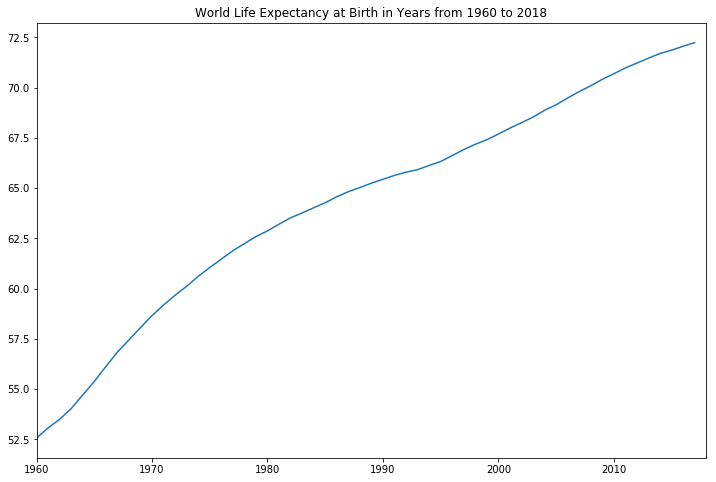

In [3]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

var_drop = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

# creates a dataframe of the row containing the data aggregated at the World level
# dropping the non-numeric data columns and transposing it for plotting purposes
life_exp_world = life_exp.loc[life_exp['Country Name'] == 
                              'World',:].drop(var_drop, axis = 1).transpose()
# plots  the life expectancy at birth in years for the World
life_exp_world.plot(title = 'World Life Expectancy at Birth in Years from 1960 to 2018', 
                    legend = False);

It looks like the final year (2018) is missing all values, so we will remove that year from our analysis. There may also be a slight downward trend in the number of missing values per year, but it is hard to tell with the current y-axis scale.

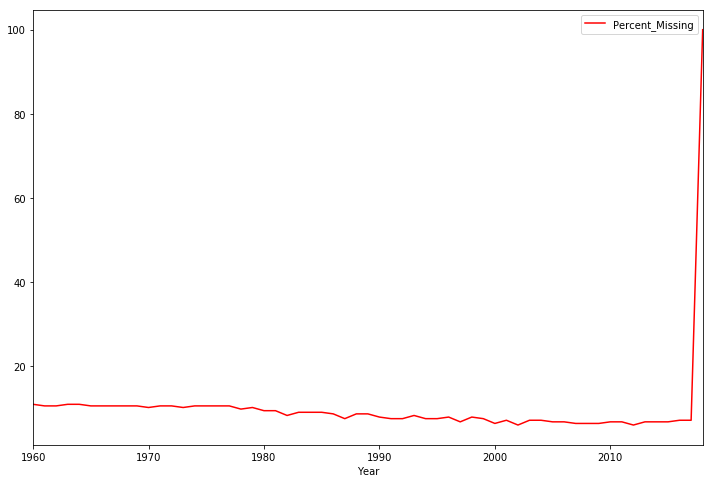

In [4]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# loops through the year columns and calculates the percent of missing values for each year
# to display for sample period selection purposes

# creates a data frame to append with the number of missing values per year
life_exp_years_missing = pd.DataFrame()

# fills in the dataframe with the years 1960 to 2018
life_exp_years_missing['Year'] = range(1960, 2019)

# initializes an empty list to add the percent of missing values per year to, and then
# add to the dataframe
perc_na = list()

# loops through 1960 to 2018
for col in list(range(1960,2019)):
    # converts the number to a string to allow it to be used as a column reference
    col = str(col)
    # counts the number of missing values in each year column, divides by the total
    # number of countries and adds it to th list
    perc_na.append(life_exp[col].isna().sum() / life_exp.shape[0])

# adds in the number of missing observations in a new column of the dataframe    
life_exp_years_missing['Percent_Missing'] = perc_na
# multiplies it by 100 to convert from a proportion to a percentage    
life_exp_years_missing['Percent_Missing'] *= 100

# a line chart comparing year and number of missing values
life_exp_years_missing.plot(kind = 'line', x = 'Year' , y = 'Percent_Missing', color='red')
plt.show()

There is certainly a downward trend in the number of missing observations per year, starting in the mid-1970s, but it stays between 11 and 6 percent over the entire range.

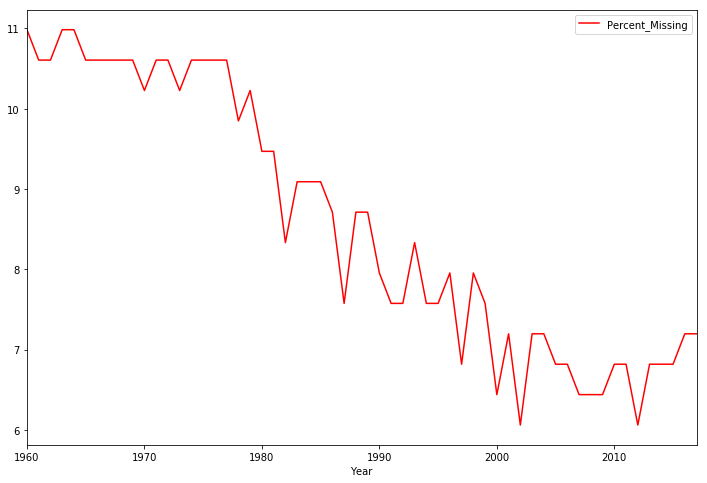

In [5]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# removes the row for 2018 from the missing values dataframe to make visualization easier
life_exp_years_missing.drop(life_exp_years_missing.tail(1).index,inplace=True)

# a line chart comparing year and number of missing values
life_exp_years_missing.plot(kind = 'line', x = 'Year' , y = 'Percent_Missing', color='red')
plt.show()

### **B. GDP per Capita**

GDP per capita seems to be missing for some observations, but it looks like more data is available later in the data set. Country Code and Indicator Name are again irrelevant in the GDP per capita data and will be dropped later.

In [6]:
# displays the first 6 observations
gdppc.head(6)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.358816,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4124.108543,4532.889198,5253.630064
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740
5,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5182.363881,5945.678558,6889.091806,7503.174184,7551.282834,7497.726925,6458.702258,6202.690406,6284.737723,6625.507319


GDP per capita in 2019 USD has exponentially increased, with some temporary downturns. Like the increase in life expectancy, this is good for humanity.

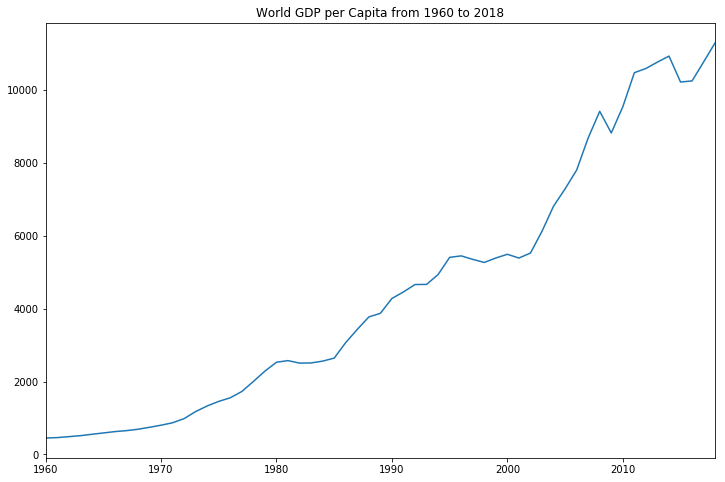

In [7]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# creates a dataframe of the row containing the data aggregated at the World level
# dropping the non-numeric data columns and transposing it for plotting purposes
gdppc_world = gdppc.loc[life_exp['Country Name'] == 
                              'World',:].drop(var_drop, axis = 1).transpose()
# plots the GDP per Capita in 2019 USD for the World
gdppc_world.plot(title = 'World GDP per Capita from 1960 to 2018', 
                 legend = False);

There are a lot of missing values in the GDP per capita data, so it will be the limiting factor for the number of years we can look at when we look at the relationship between GDP per capita and life expectancy at birth.

I will use 1990 as my cuttoff point because there is a big drop in the number of missing values from 1989 to 1990 and the number of missing values falls below 20%.

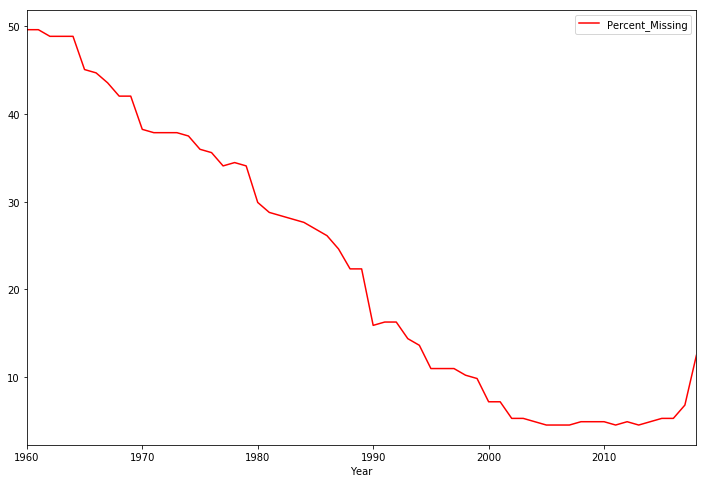

In [8]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# loops through the year columns and calculates the percent of missing values for each year
# to display for sample period selection purposes

# creates a data frame to append with the number of missing values per year
gdppc_years_missing = pd.DataFrame()

# fills in the dataframe with the years 1960 to 2018
gdppc_years_missing['Year'] = range(1960, 2019)

# initializes an empty list to add the percent of missing values per year to, and then
# add to the dataframe
perc_na = list()

# loops through 1960 to 2018
for col in list(range(1960,2019)):
    # converts the number to a string to allow it to be used as a column reference
    col = str(col)
    # counts the number of missing values in each year column, divides by the total
    # number of countries and adds it to th list
    perc_na.append(gdppc[col].isna().sum() / gdppc.shape[0])

# adds in the number of missing observations in a new column of the dataframe    
gdppc_years_missing['Percent_Missing'] = perc_na
# multiplies it by 100 to convert from a proportion to a percentage    
gdppc_years_missing['Percent_Missing'] *= 100

# a line chart comparing year and number of missing values
gdppc_years_missing.plot(kind = 'line', x = 'Year' , y = 'Percent_Missing', color='red')
plt.show()

## **III. Exploratory Analysis and Data Transformation**

Performing an inner join on the life expectancy and GDP per capita data sets in the period from 1990 to 2017 leaves 75.12% of the countries, which is enough for me to precede with my analysis (based on my judgement). Now I am able to perform some exploratory graphing.

In [9]:
# defines a function to drop years from a dataframe
def year_dropper(df, start_year, end_year):
    # creates and empty list of years for dropping
    year_drop = []
    # for year in the range of years we want to drop
    for year in range(start_year, end_year + 1):
        # converts it to a string for column referencing and appends it to the list 
        year_drop.append(str(year))
    # for year the list of years to drop
    for year in year_drop:
        # drops the years needed to be dropped from the dataframe
        df = df.drop(year, axis = 1)
    
    # returns the dataframe
    return(df)

# creates a dataframe of non-differenced variables
lifexp_df = year_dropper(life_exp, 1960, 1989)
gdppc_df = year_dropper(gdppc, 1960, 1989)

# drops 2018, and other variables
lifexp_df = lifexp_df.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2018'], 
                           axis = 1)
gdppc_df = gdppc_df.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2018'], 
                         axis = 1)

# creates an empty dictionary that will hold the new column names
life_dict_names = {}
# creates a list of variable columns
life_cols = []
# loops through the non-country name variables
for i in lifexp_df.columns[1:]:
    # creates a new name from the year and a tag
    new_name = str(i) + '_lifexp'
    # adds the new name to the dictionary with the old dictionary as the key
    life_dict_names[i] =  new_name
    # appends to the variable name list
    life_cols.append(new_name)
# renames the columns in the dataframe
lifexp_df = lifexp_df.rename(columns = life_dict_names)

# creates an empty dictionary that will hold the new column names
gdppc_dict_names = {}
# creates a list of variable columns
gdppc_cols = list()
# loops through the non-country name variables
for i in gdppc_df.columns[1:]:
    # creates a new name from the year and a tag
    new_name = str(i) + '_gdppc'
    # adds the new name to the dictionary with the old dictionary as the key
    gdppc_dict_names[i] =  new_name
    # appends to the variable name list
    gdppc_cols.append(new_name)
# renames the columns in the dataframe
gdppc_df = gdppc_df.rename(columns = gdppc_dict_names)

# performs an inner merge
comb = pd.merge(lifexp_df, gdppc_df, how = 'inner')

# creates a list of the observations that aren't countries
double_count = ['Arab World', 'Central Europe and the Baltics', 'Caribbean small states',
               'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
               'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
               'Europe & Central Asia', 'Euro area', 'European Union', 
                'Fragile and conflict affected situations', 'High income', 
                'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total',
               'IDA total', 'IDA blend', 'IDA only', 'Not classified', 
                'Latin America & Caribbean (excluding high income)', 
               'Latin America & Caribbean', 'Least developed countries: UN classification',
               'Low income', 'Lower middle income', 'Low & middle income', 
               'Late-demographic dividend', 'Middle East & North Africa', 'Middle income',
               'Middle East & North Africa (excluding high income)', 'North America',
               'OECD members', 'Other small states', 'Pre-demographic dividend',
               'Pacific island small states', 'Post-demographic dividend', 'South Asia',
               'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 
               'Small states', 'East Asia & Pacific (IDA & IBRD countries)',
               'Europe & Central Asia (IDA & IBRD countries)', 
                'Latin America & the Caribbean (IDA & IBRD countries)',
               'Middle East & North Africa (IDA & IBRD countries)',
               'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)',
               'Upper middle income', 'World']

# keeps only the rows with Country values that are not in the non-country list, which
# means the only remaining observations are for countries
comb = comb[~comb['Country Name'].isin(double_count)]

# saves the total number of countries, even those with missing values
total_countries = comb.shape[0]

# drops missing values
comb = comb.dropna()

# prints out the percent of observations remaining after dropping rows with missing values
print('Percent of Countries Remaining: ' + 
      str(round(comb.shape[0] / total_countries * 100, 2))+ '%')

Percent of Countries Remaining: 75.12%


In [10]:
# defines a function to display the histograms of input variables
def disp_histograms(df, cols, variable, start_year):
    # this block of code displays the distribution of the amount of growth in years in each
    # period

    # initializes the year at start_year, which is the first year in our dataset
    year = start_year
    # loops through the delta life expectancy at birth columns
    for i in cols:
        # creates a title for the plot
        title = 'Distribution of ' + variable + ' in Year: ' + str(year)
        # plots the column
        plt.hist(df[i])
        # adds the title
        plt.title(title)
        # displays the plot
        plt.show()
        # increments the count to move on to the next column
        year += 1

Life expectancy at birth skews left, which is good because that means the mass of the distribution is on the side of living longer. The x-axis also creeps right over time showing the growth in life expectancy for the world.

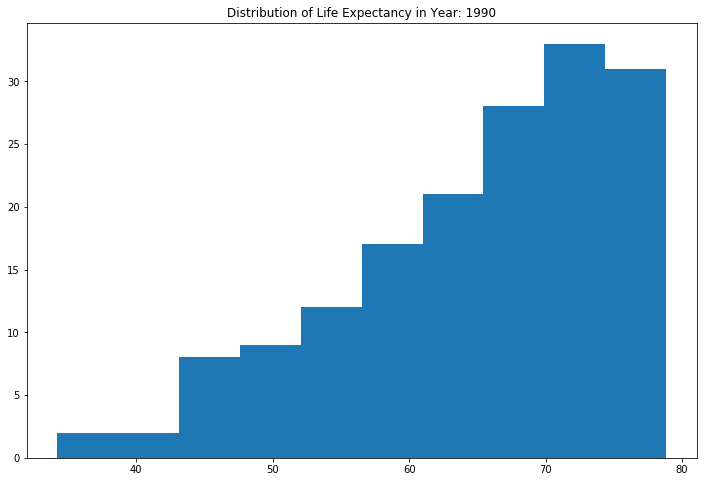

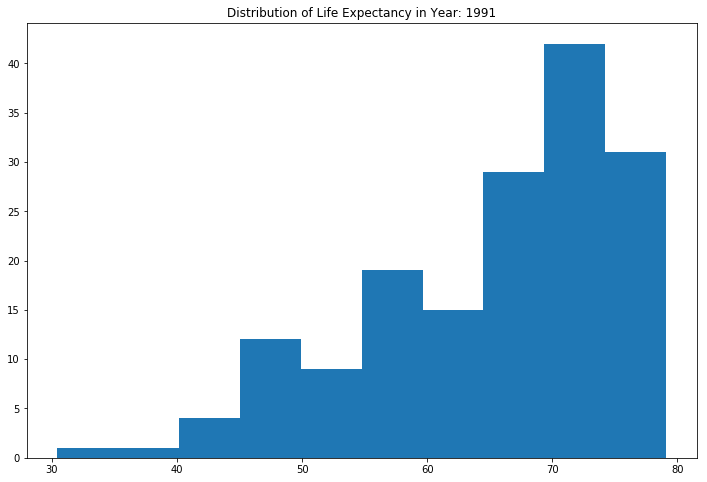

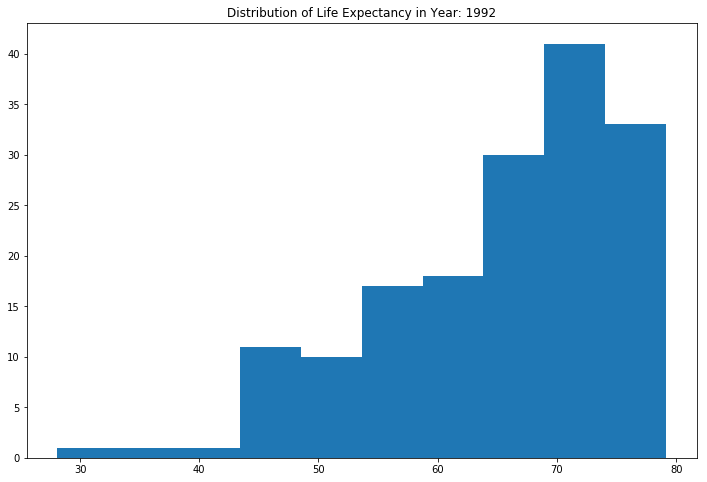

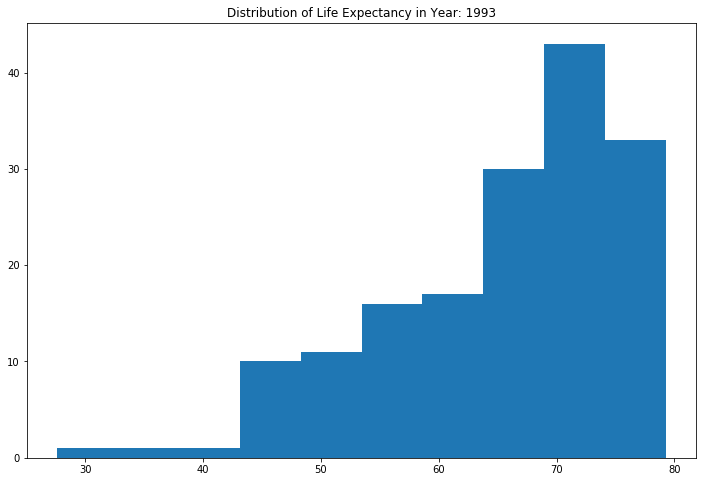

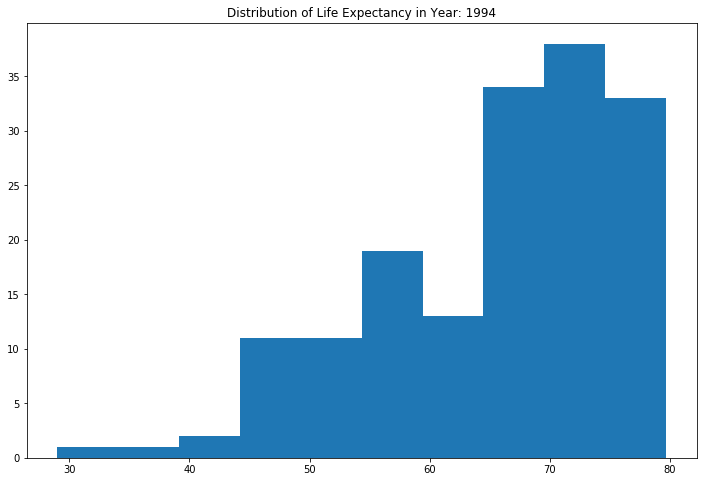

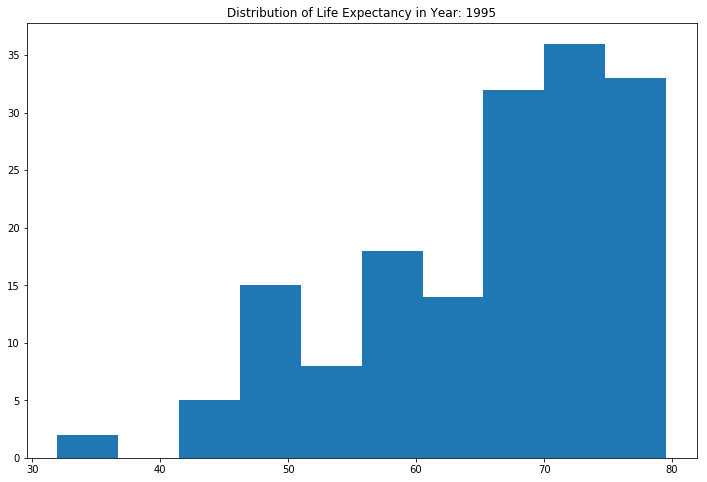

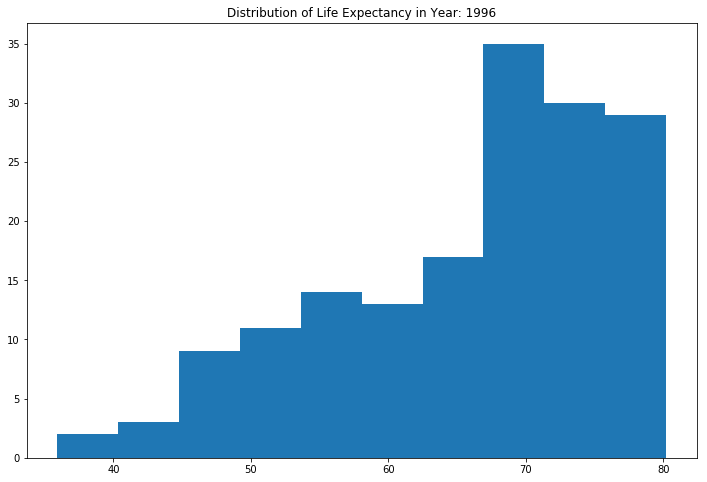

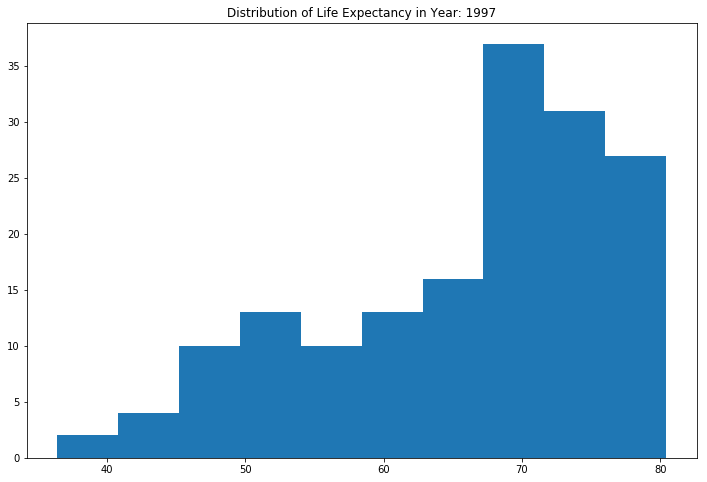

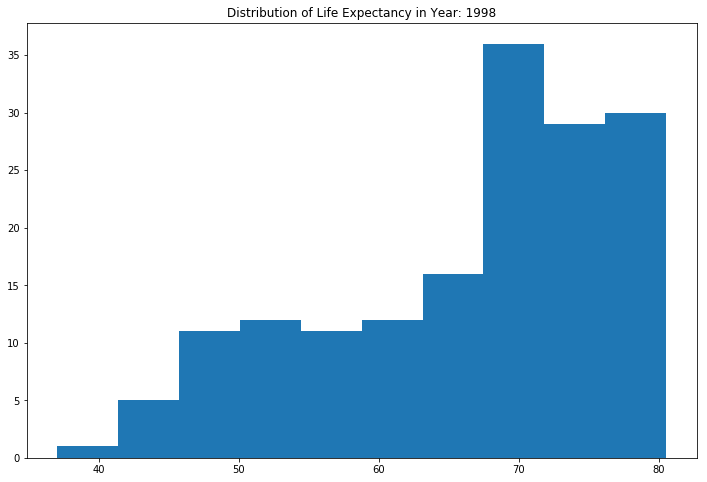

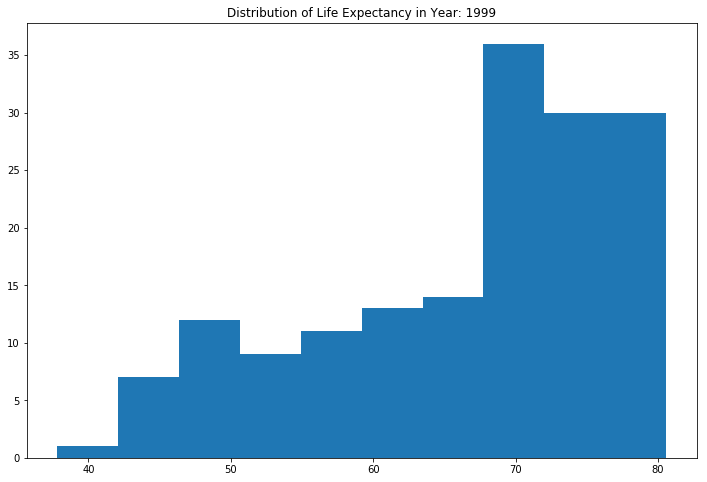

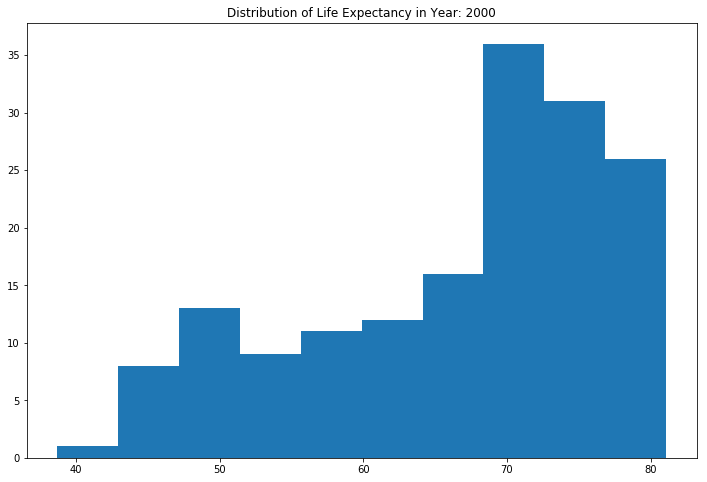

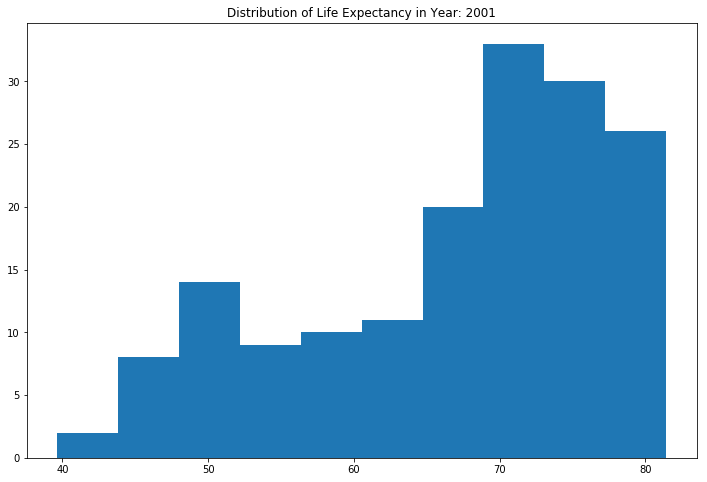

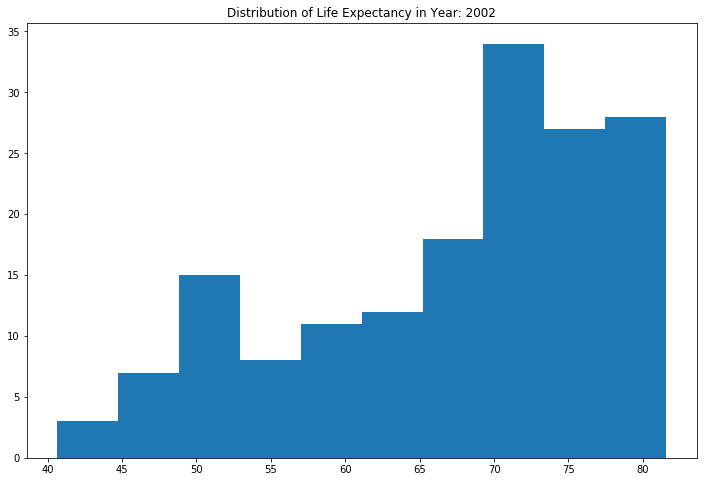

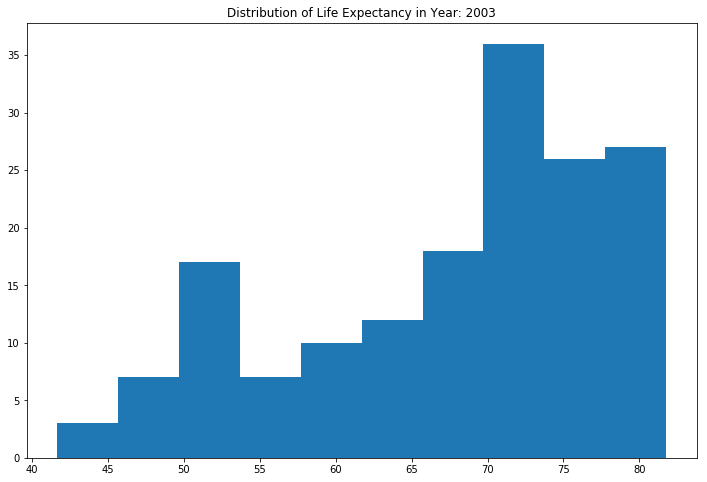

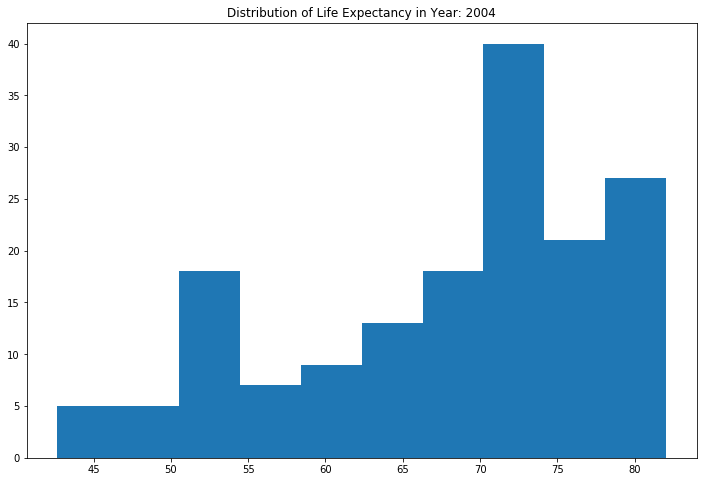

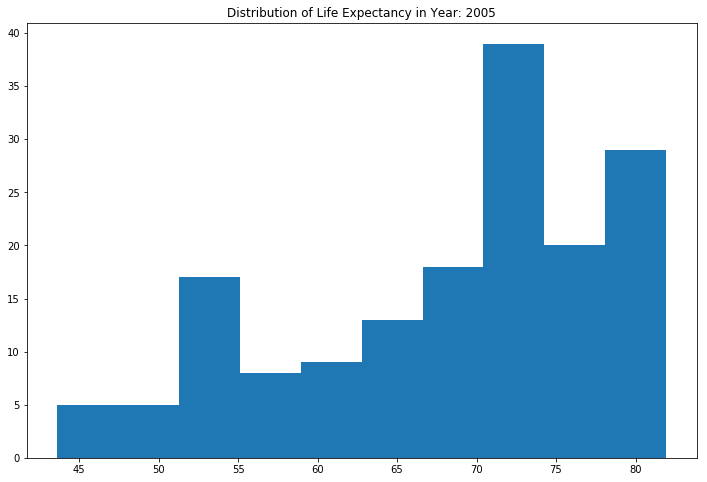

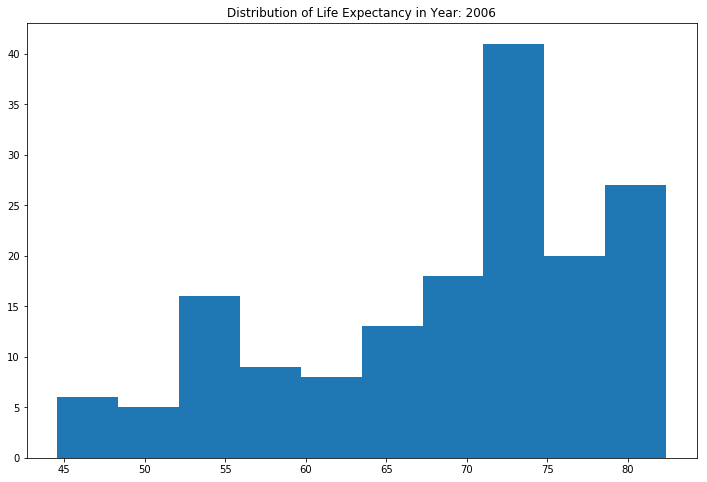

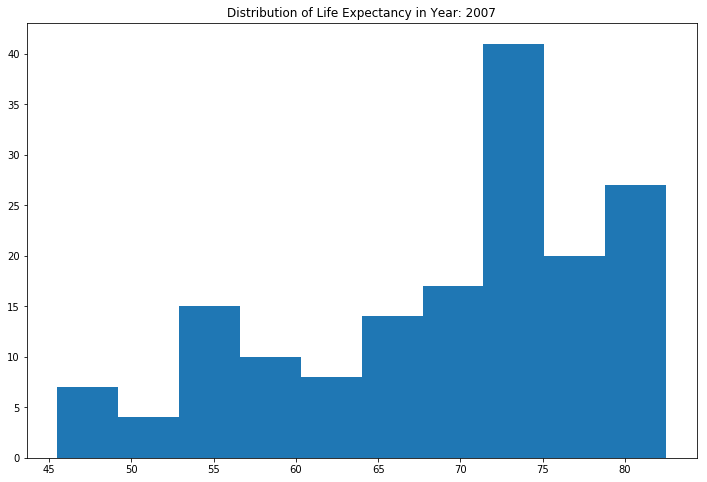

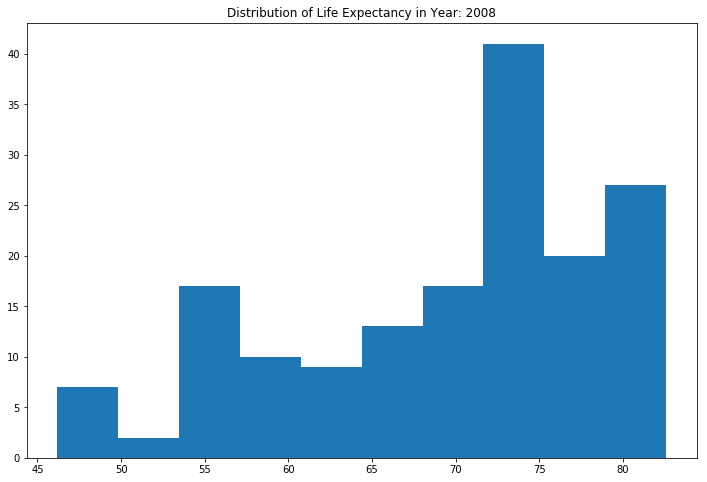

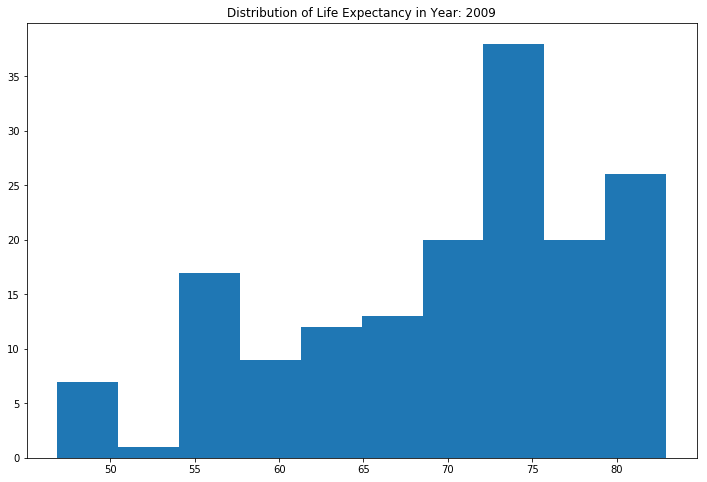

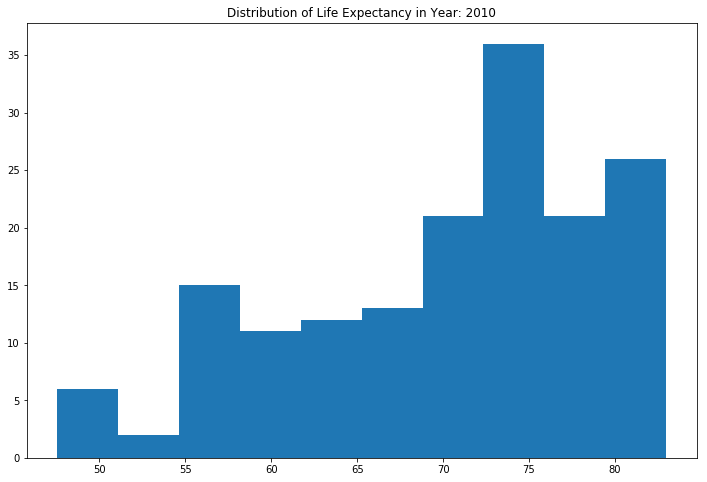

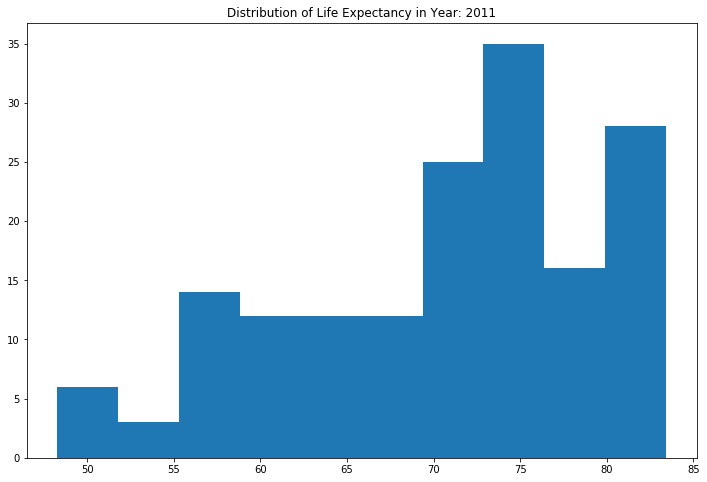

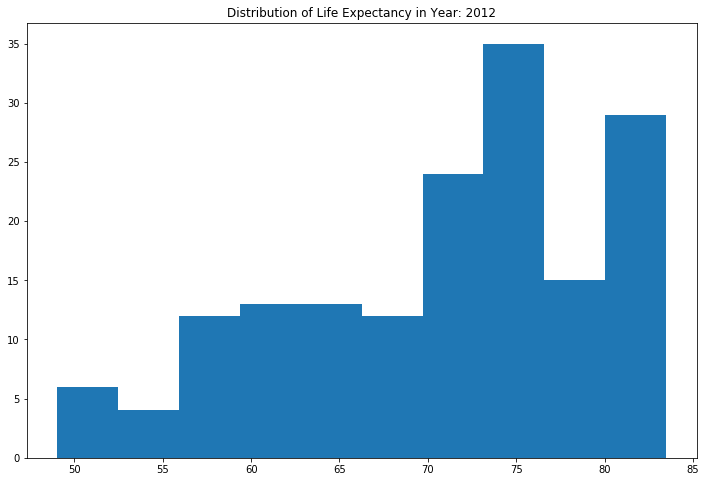

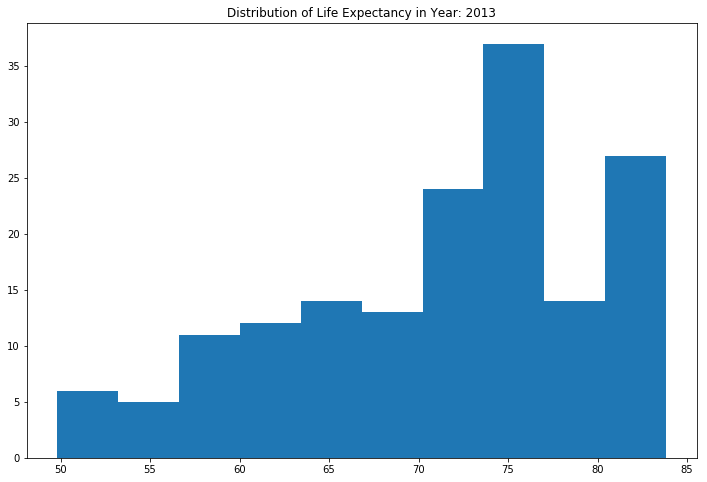

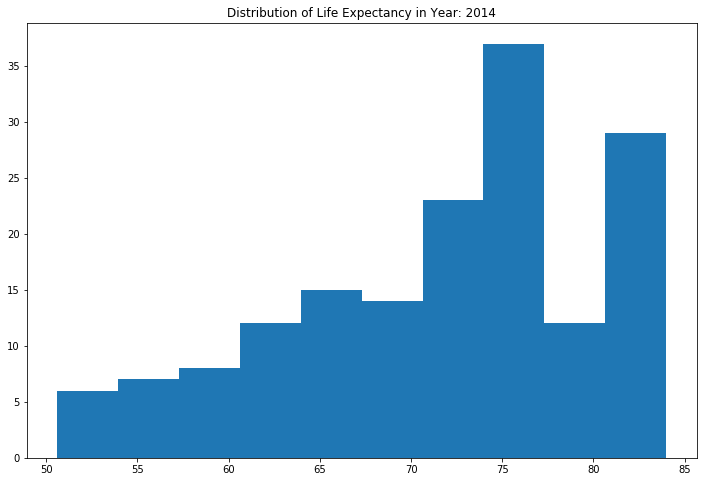

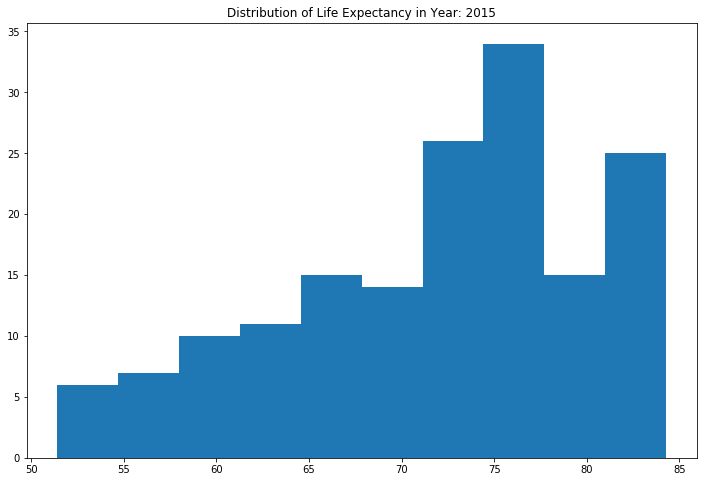

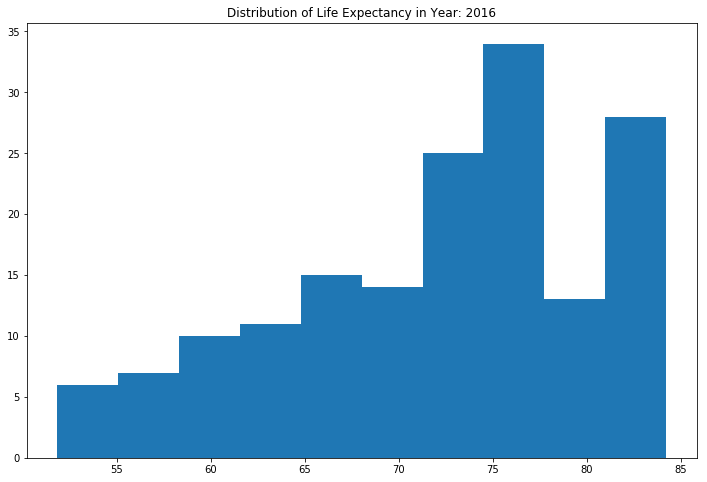

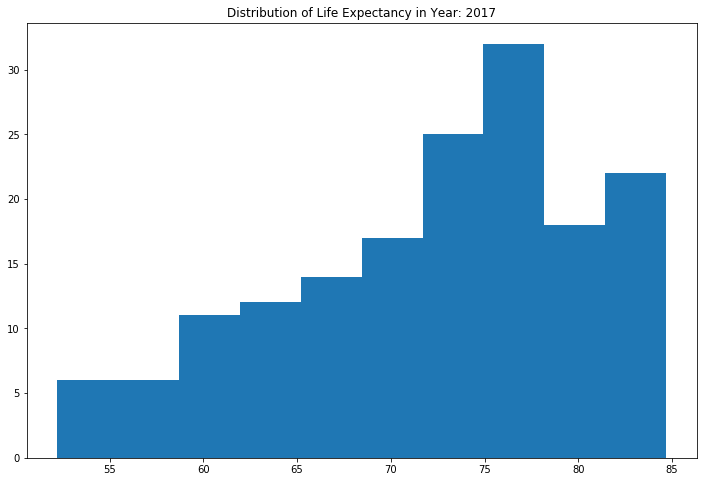

In [26]:
disp_histograms(comb, life_cols, 'Life Expectancy', 1990)

#### **I added a squared term to account for possible diminishing returns to GDP per capita from increases in life expectancy.**

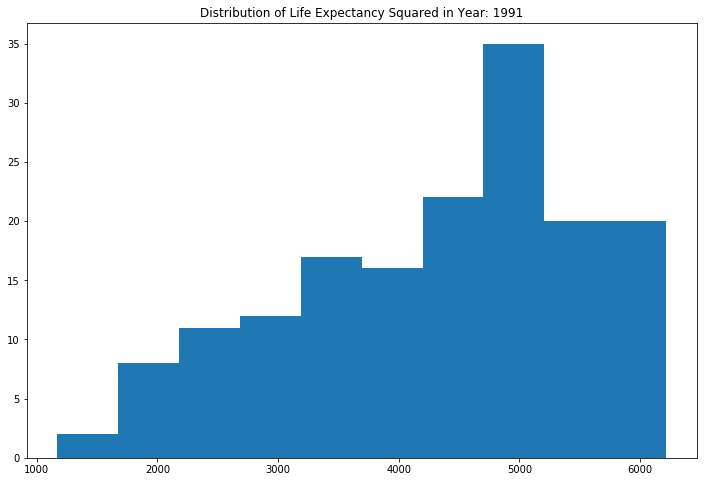

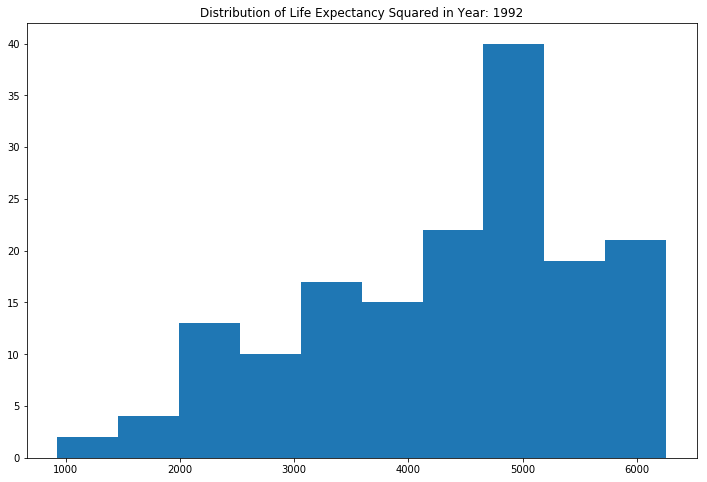

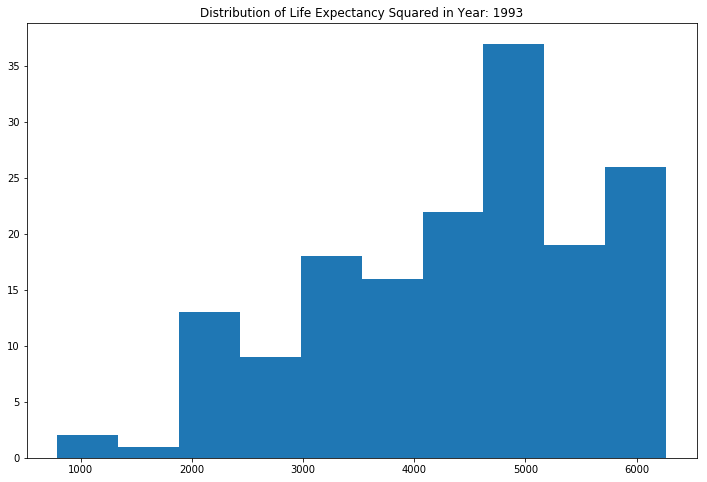

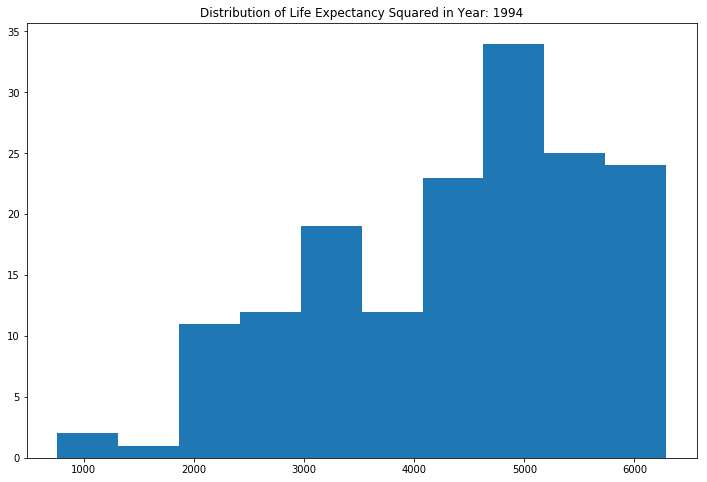

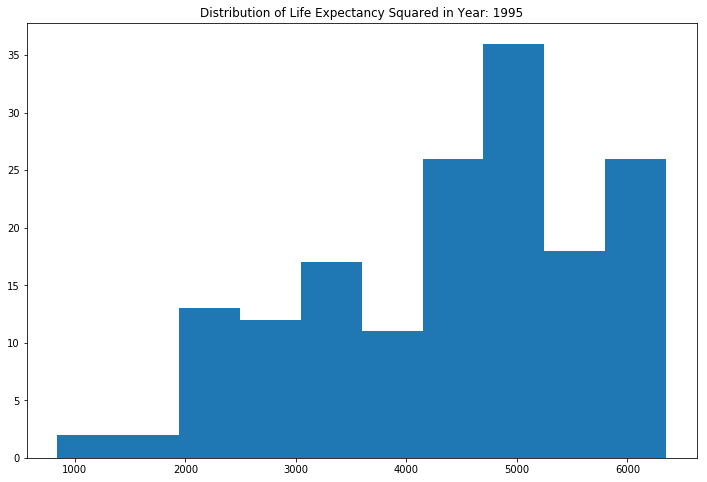

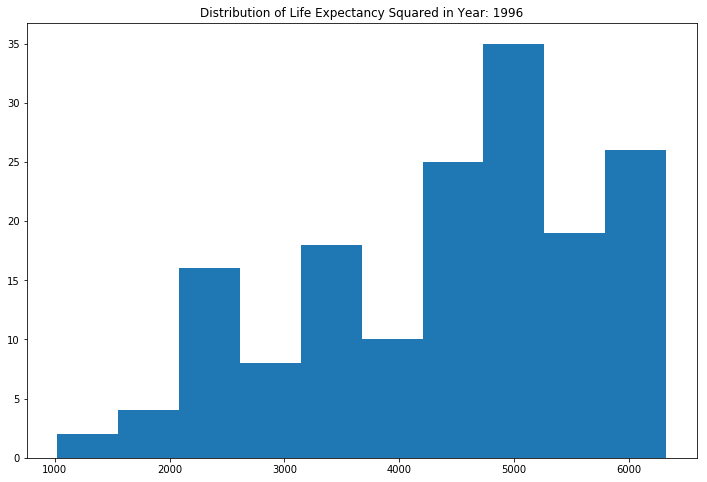

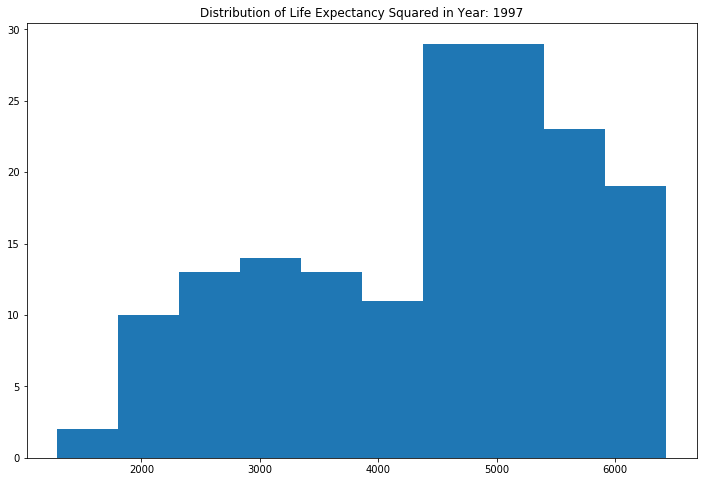

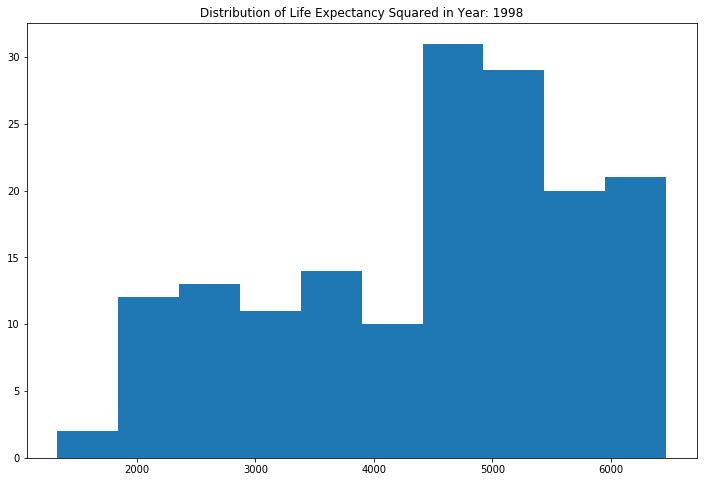

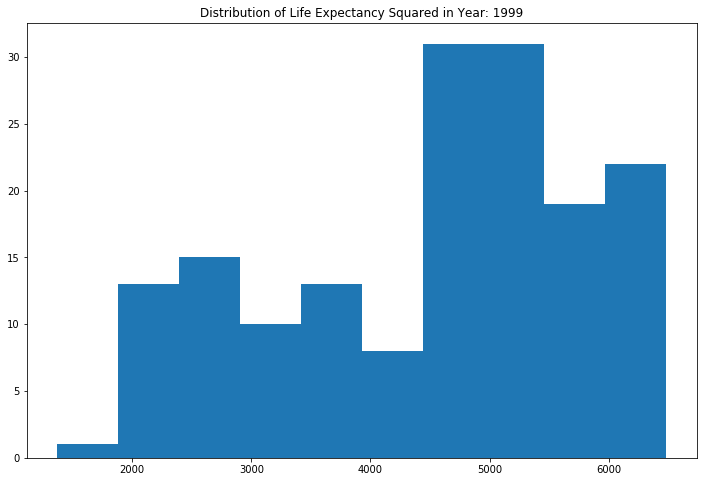

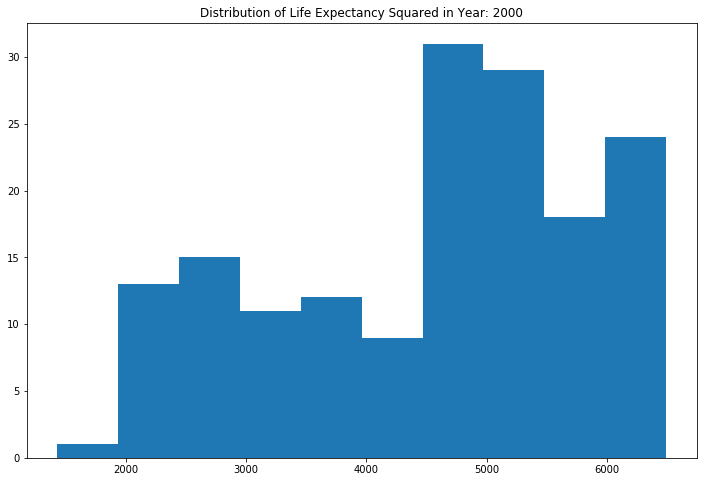

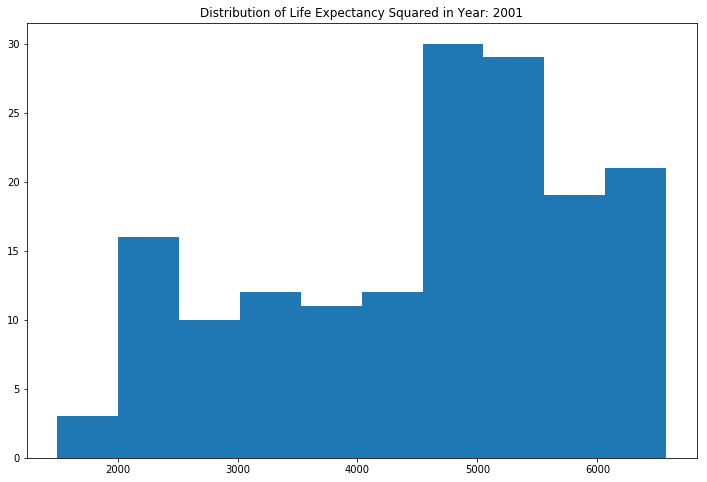

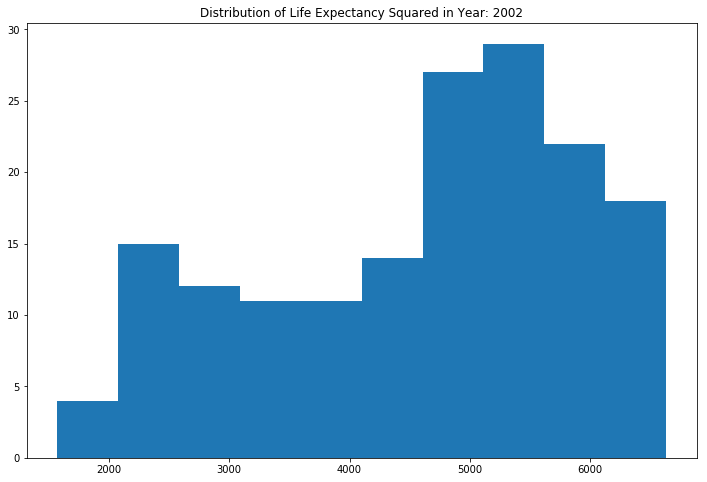

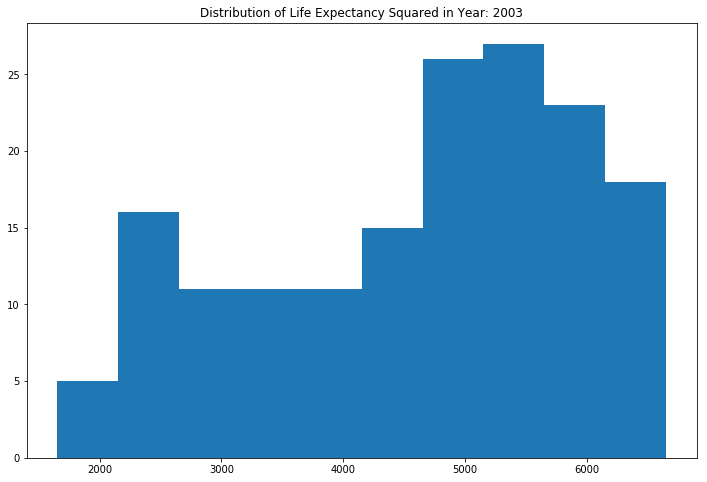

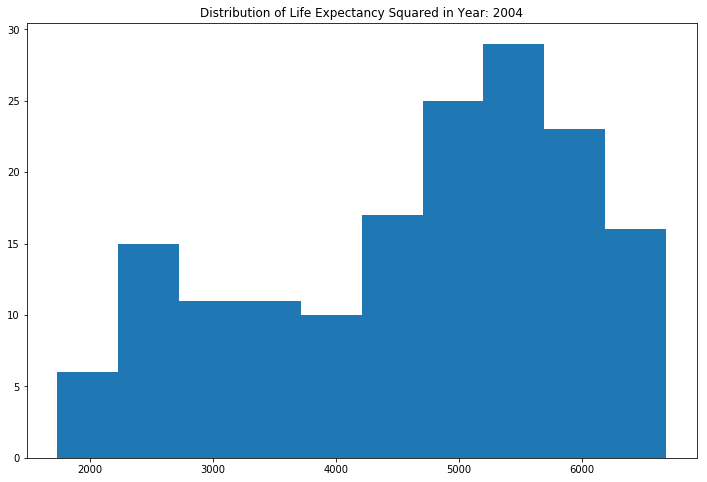

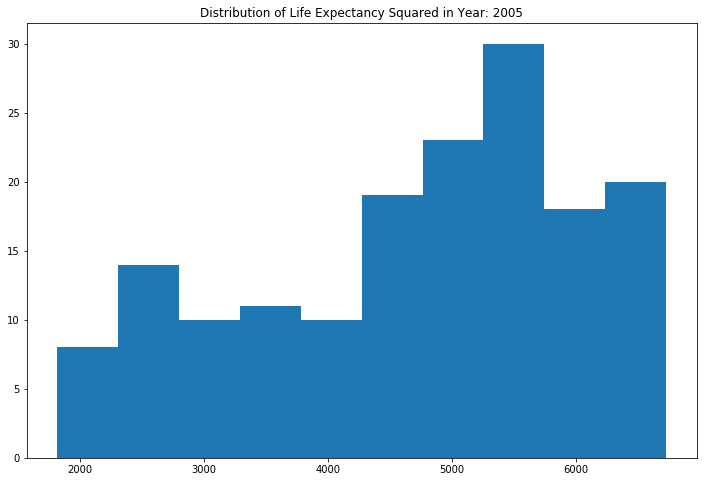

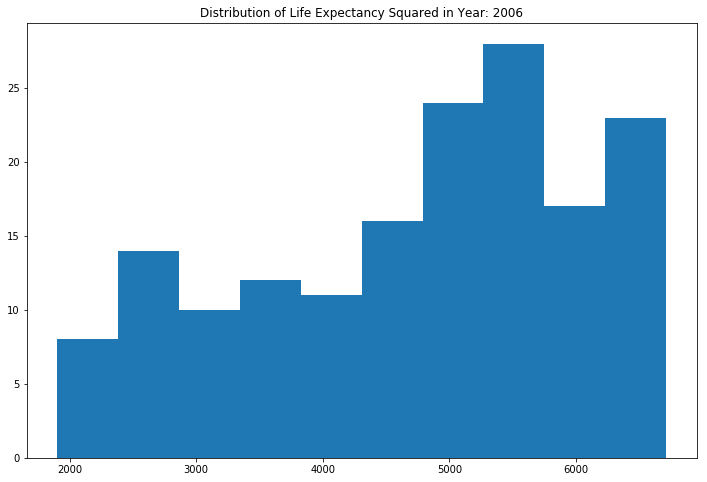

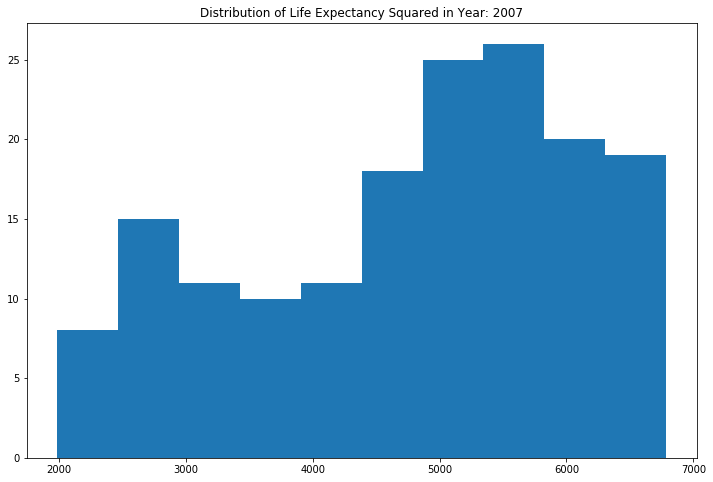

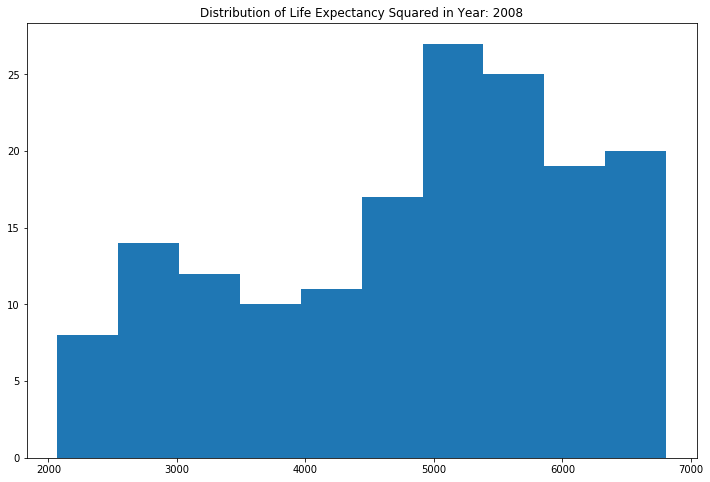

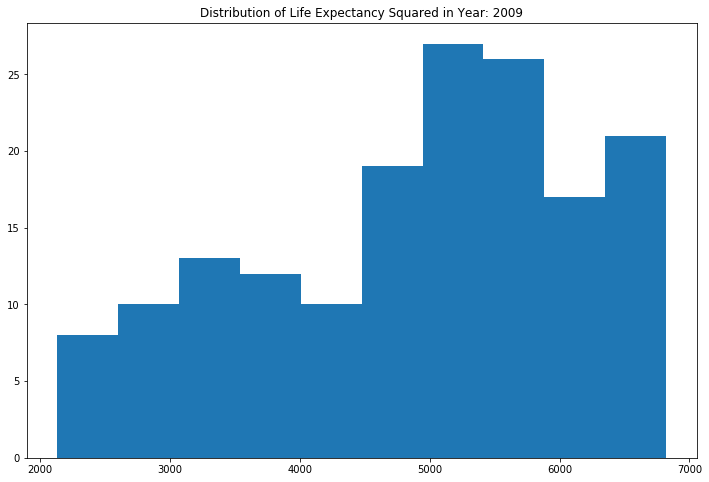

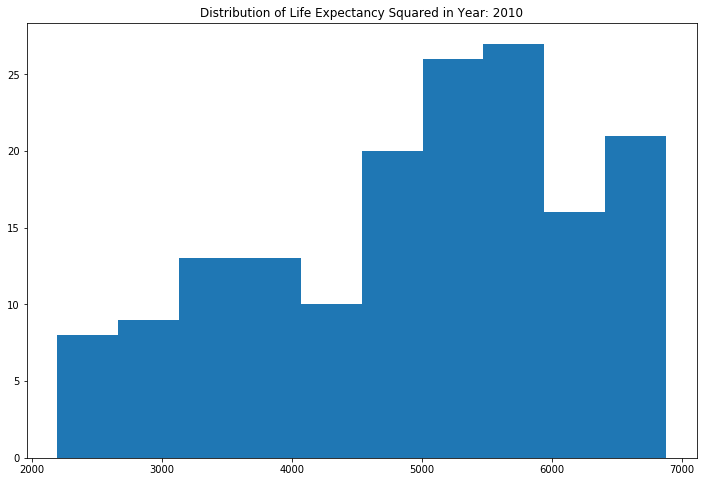

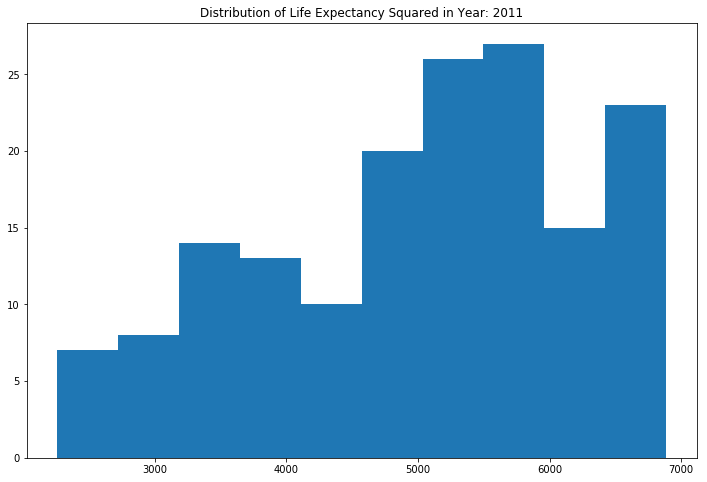

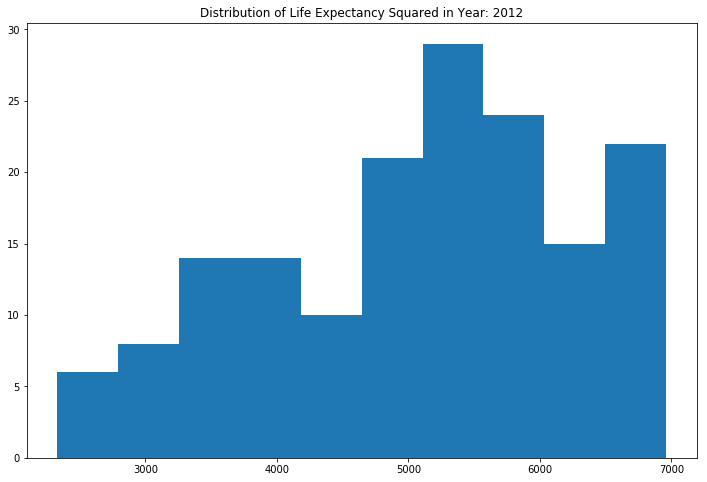

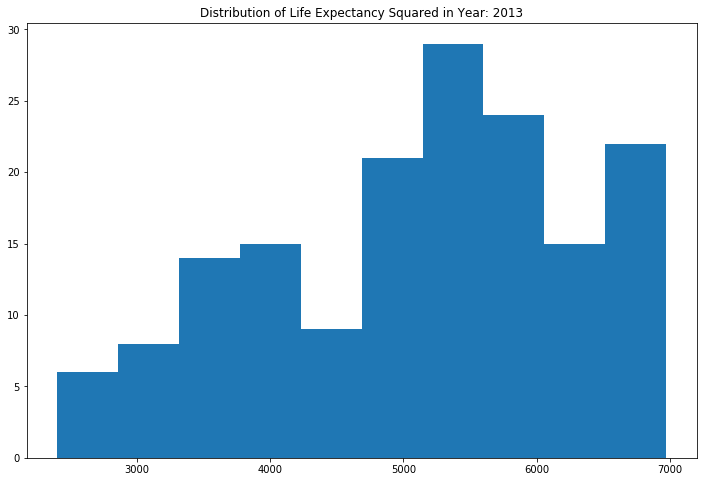

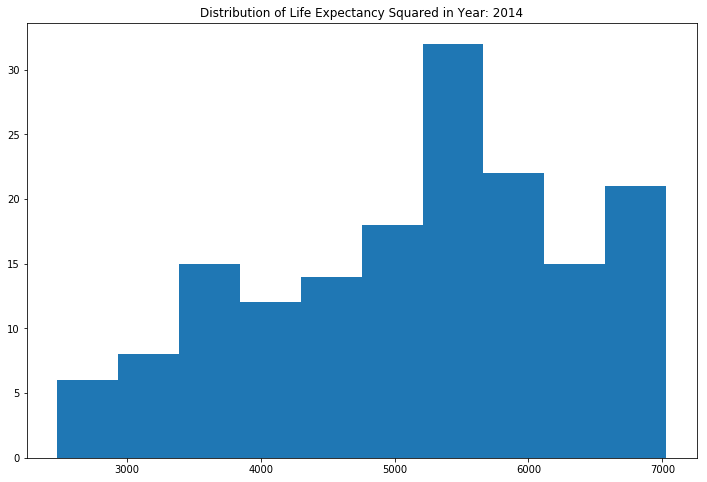

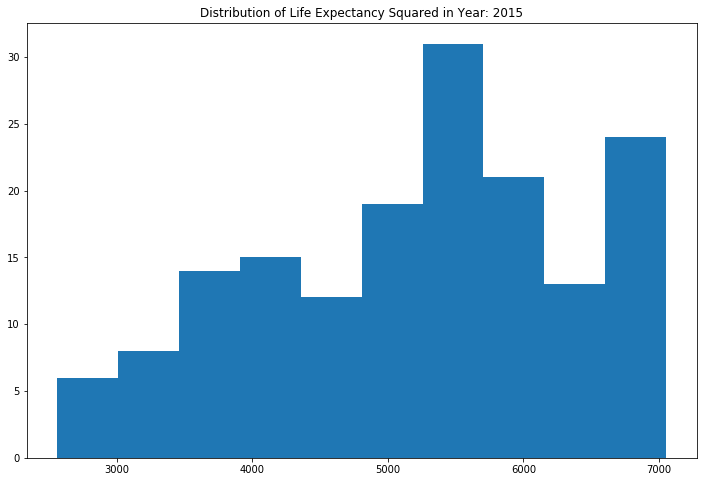

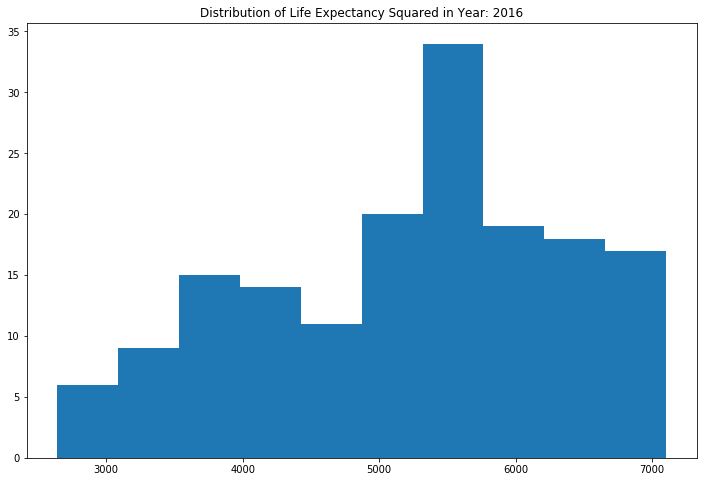

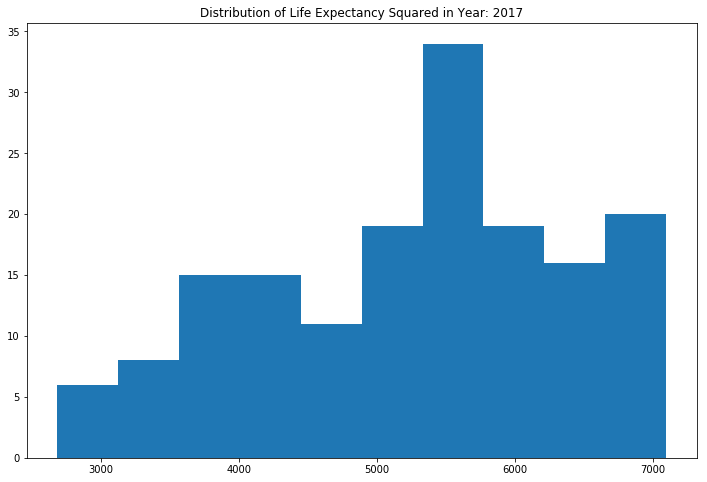

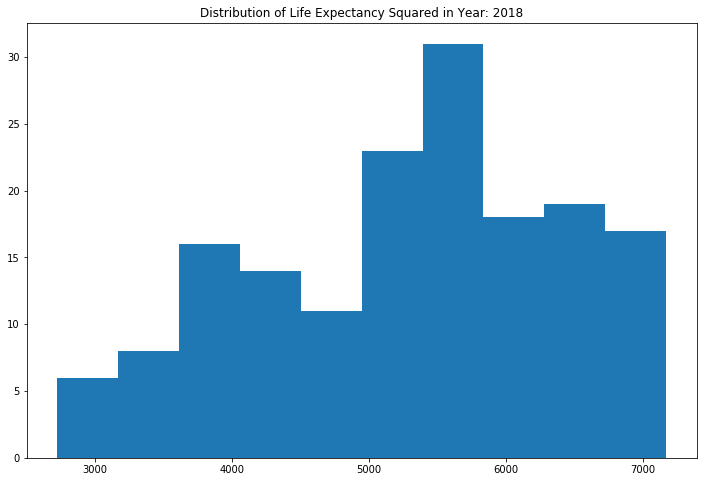

In [12]:
# creates a list to hold the squared life expectancy column names
sq_life_cols = []
# loops through the list of columns with life expectancy data
for col in life_cols:
    # creates a new variable name from the old name with a suffix indicating it is the square
    # of that column
    newvar = col + '_sq'
    # creates a new column with the newvar name equal to the square of the current column in
    # the loop
    comb[newvar] = comb[col] ** 2
    # appends this new column name to the list of column names
    sq_life_cols.append(newvar)

disp_histograms(comb, sq_life_cols, 'Life Expectancy Squared', 1991)

GDP per capita in current USD has the appearance of a Pareto distribution. The vast majority of countries have very low GDPs per capita and there are fewer and fewer countries as GDP per capita rises. It will likely need to be transformed prior to modeling. 

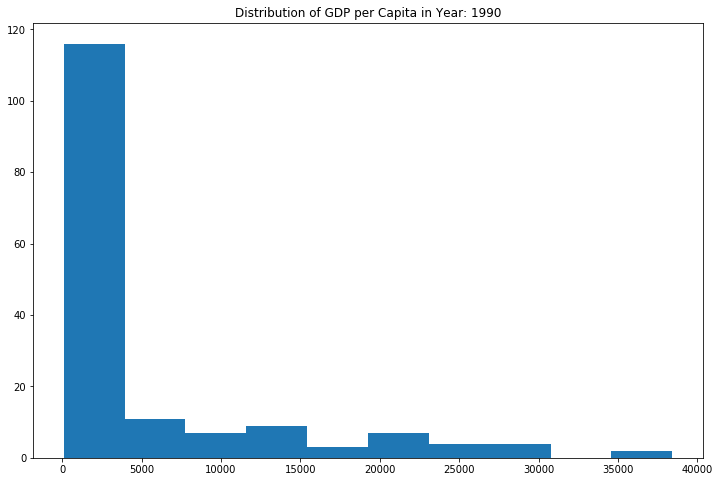

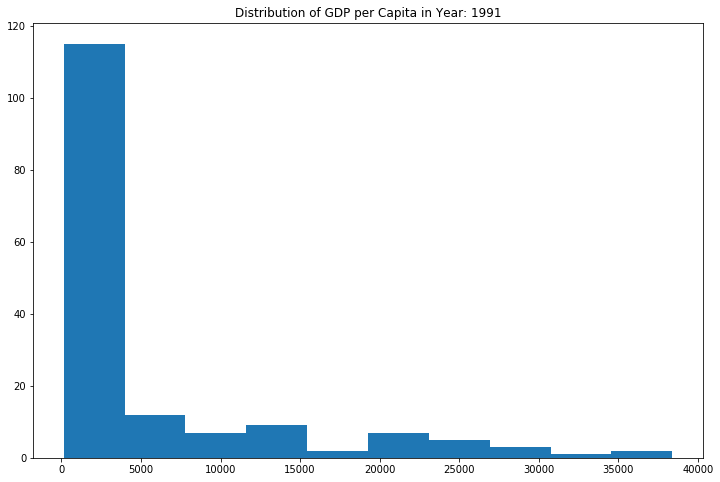

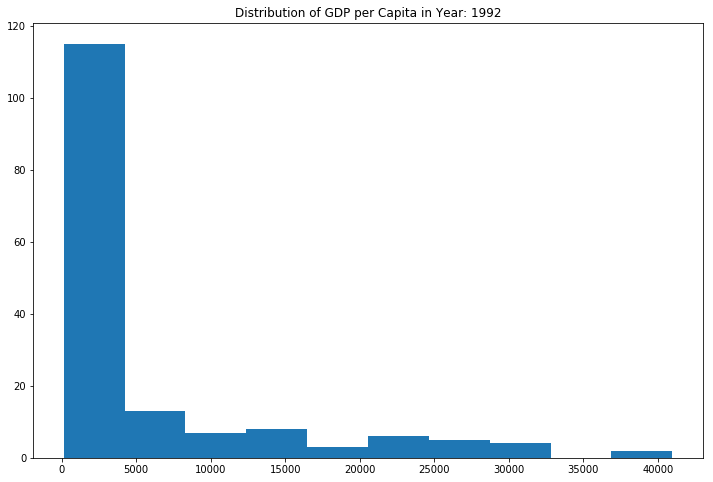

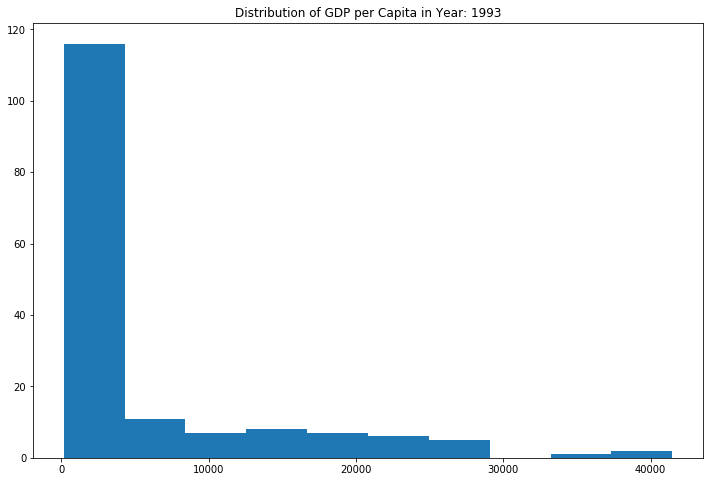

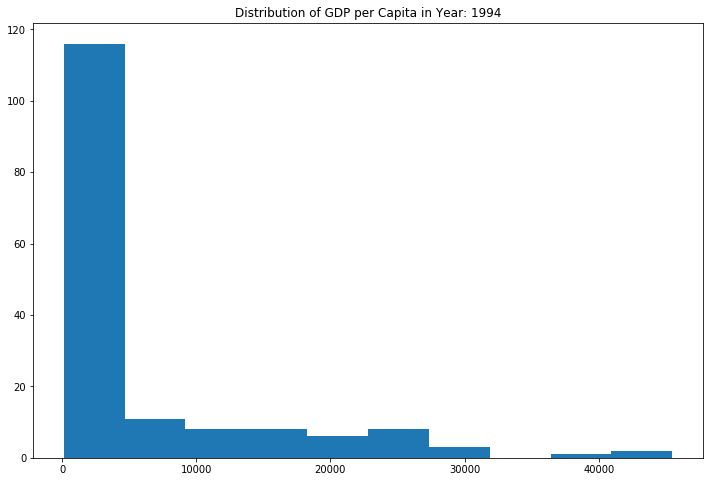

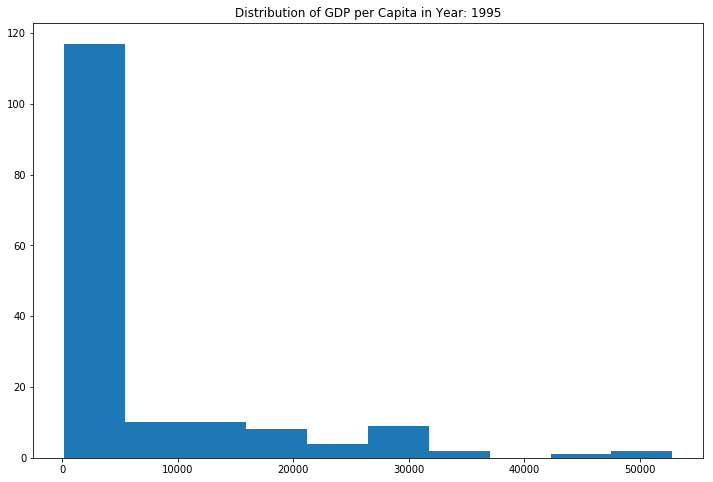

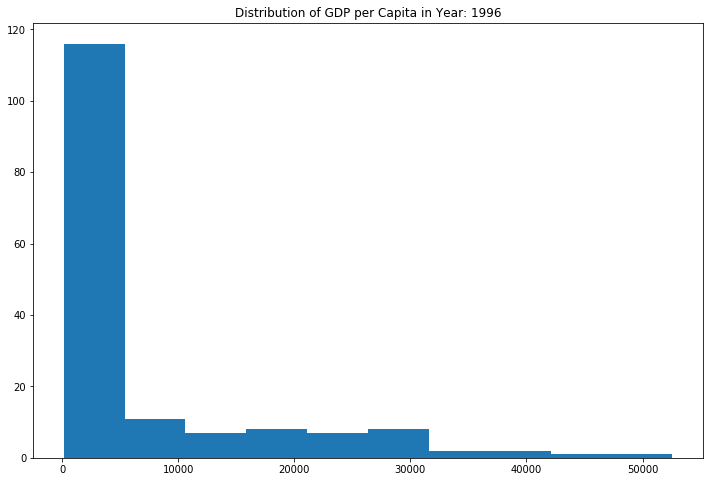

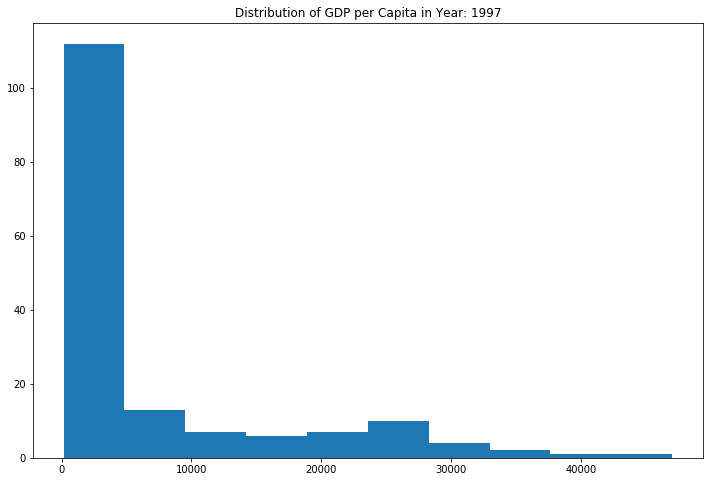

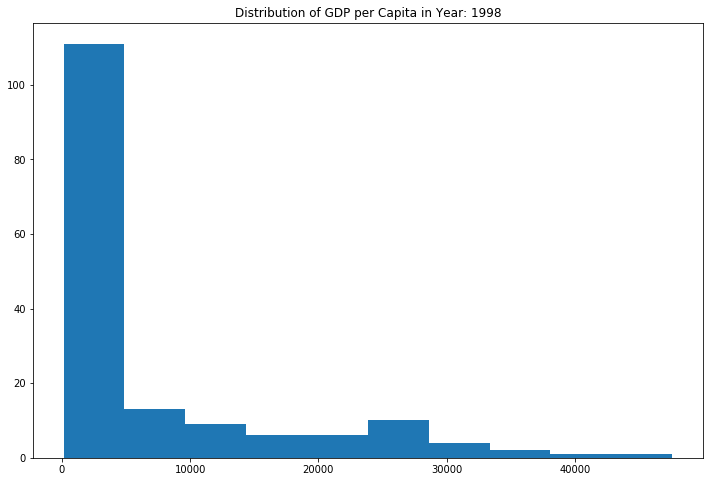

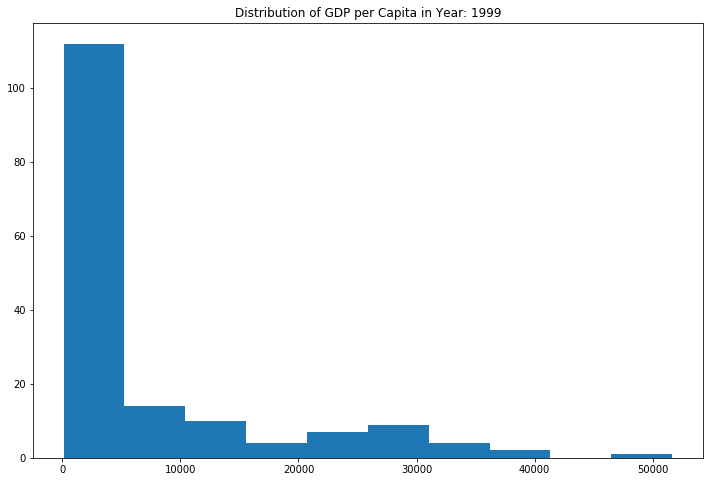

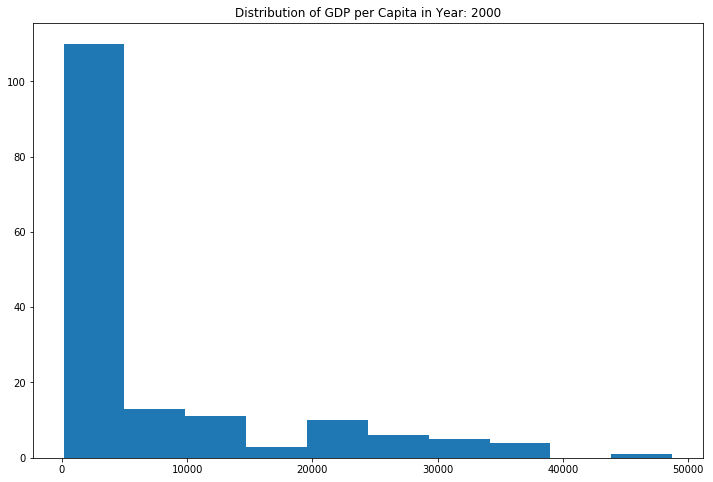

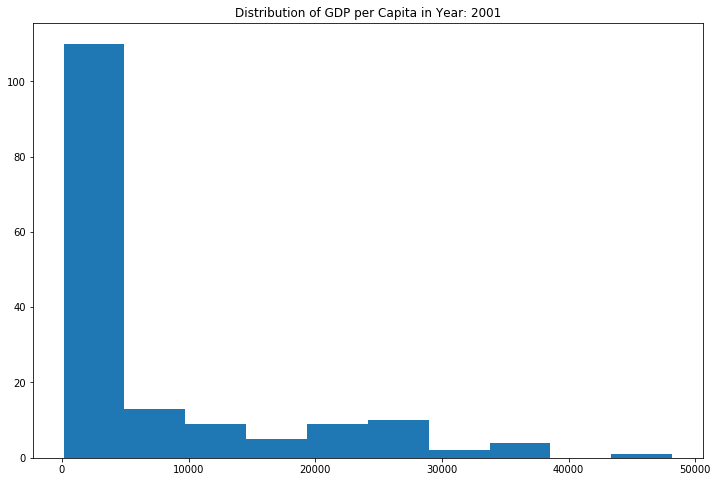

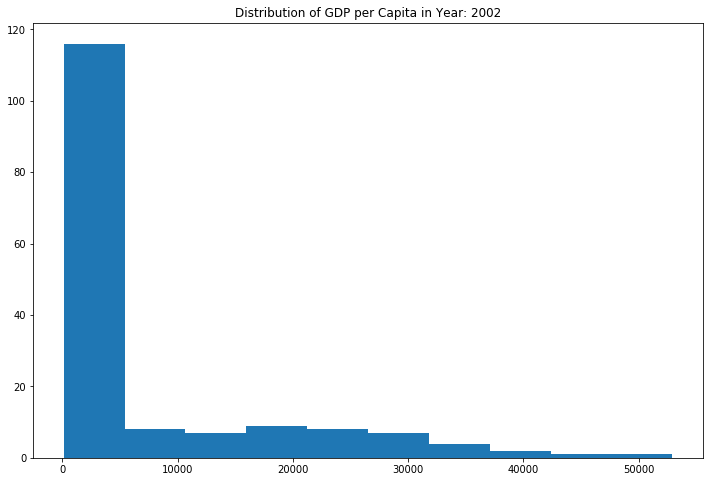

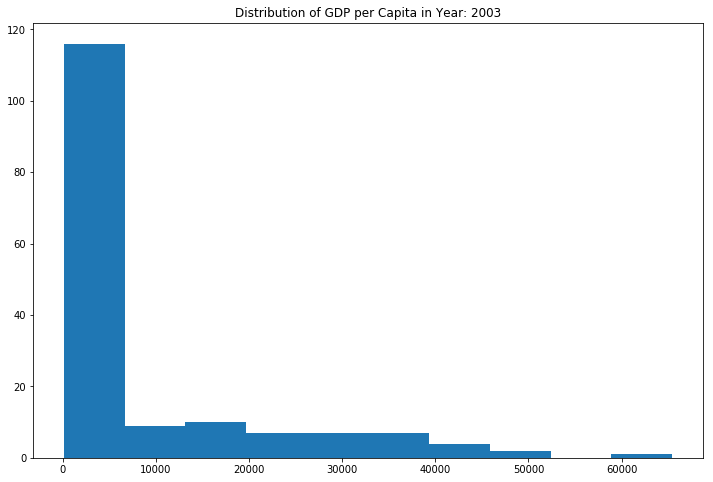

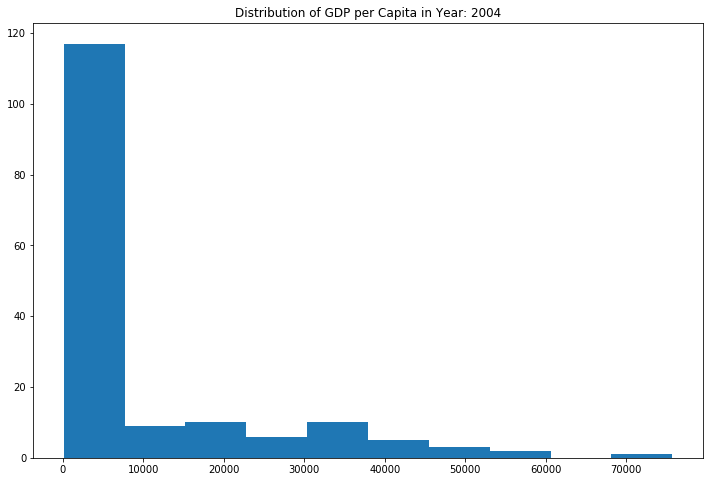

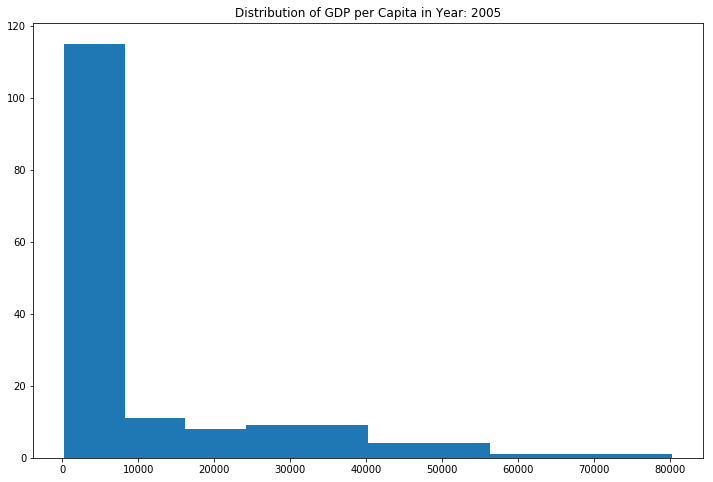

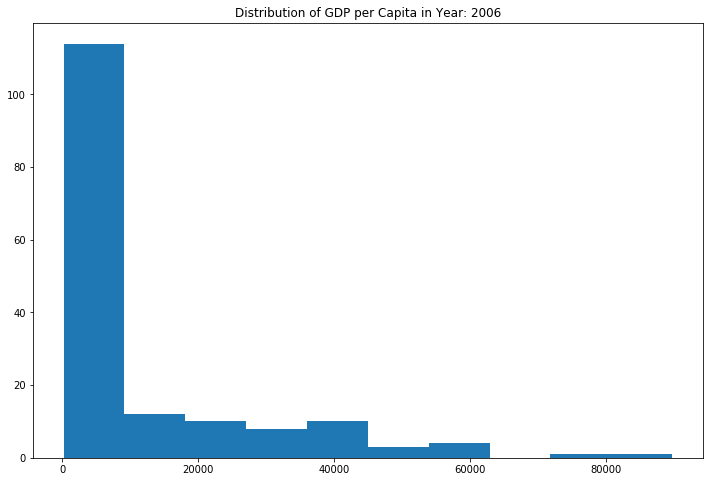

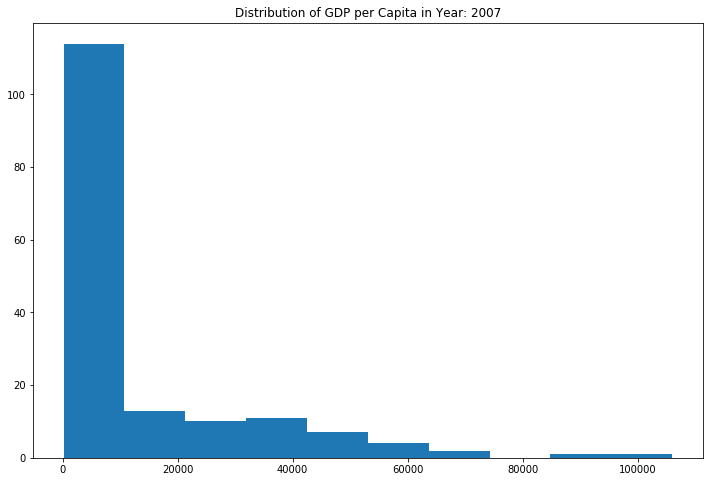

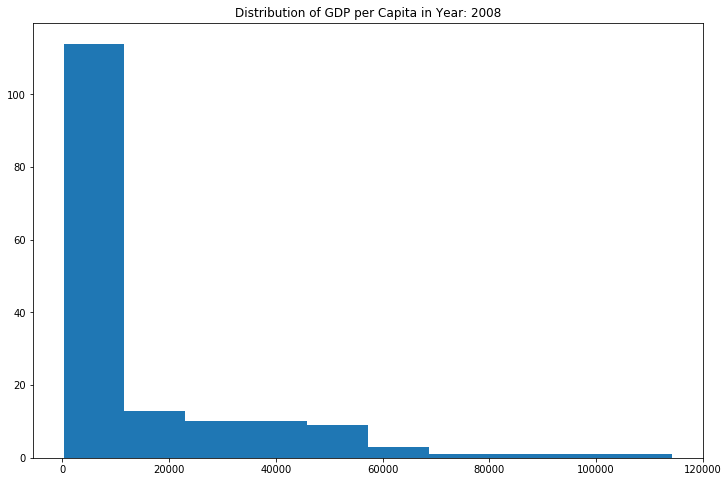

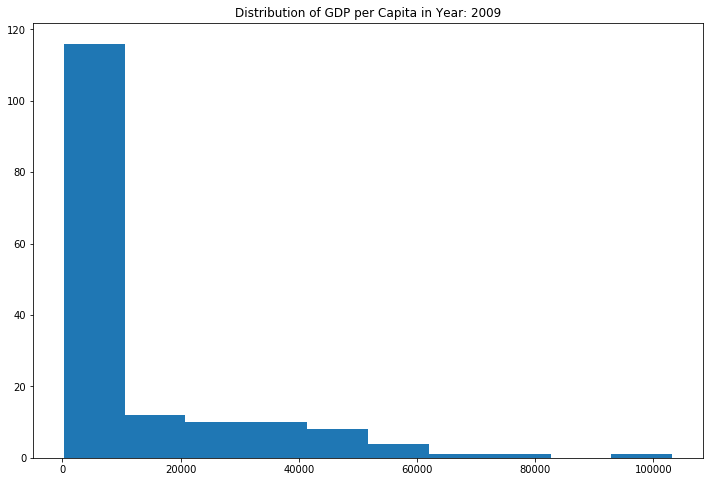

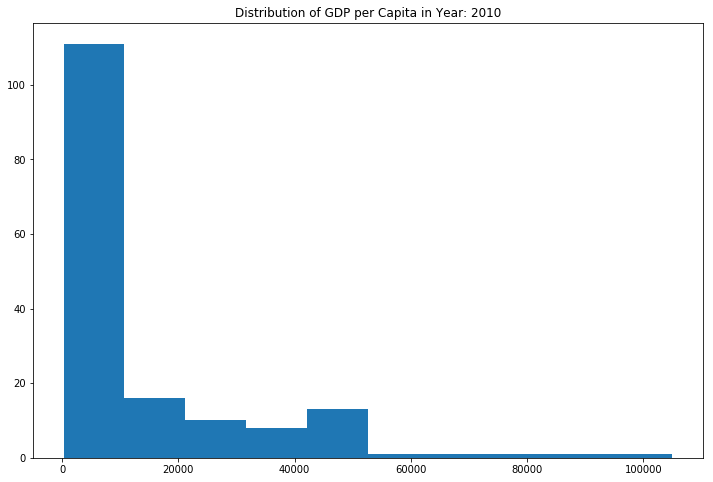

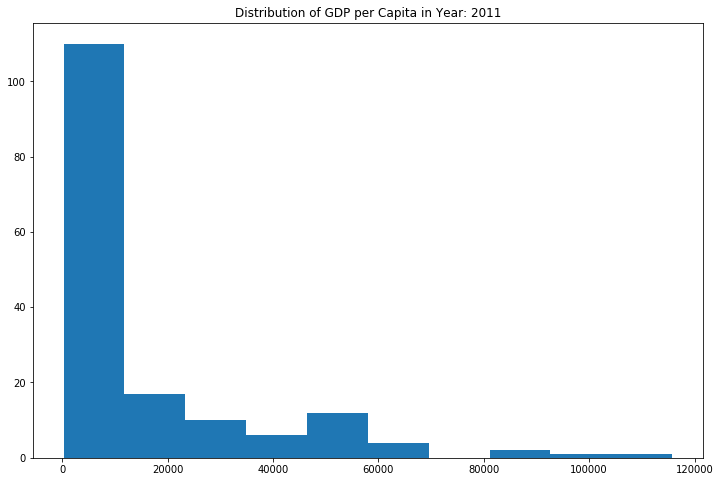

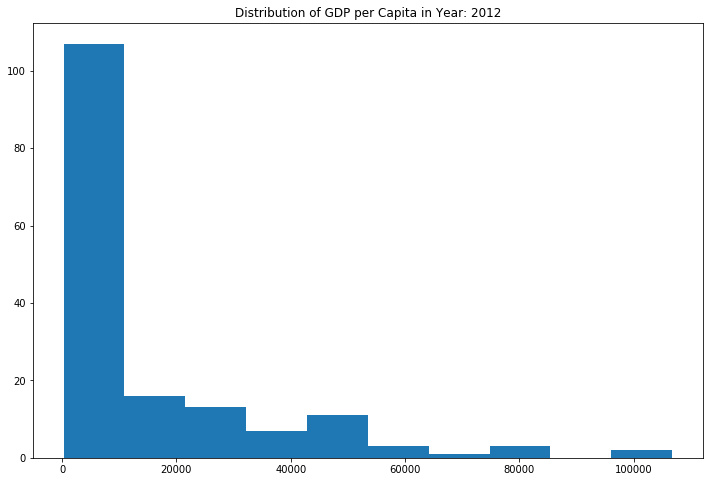

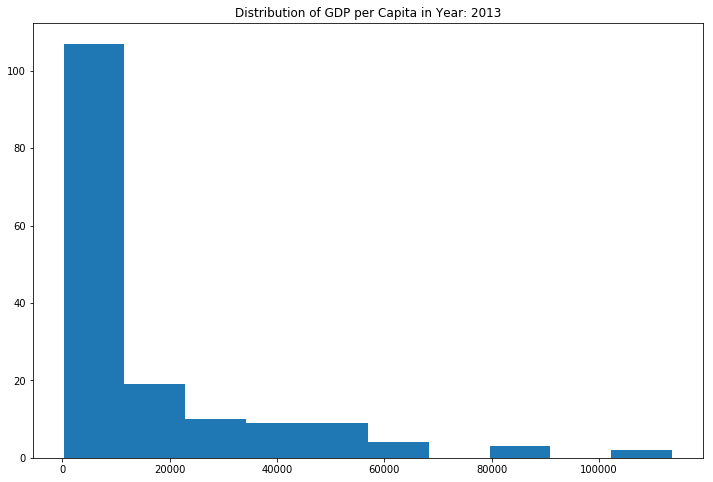

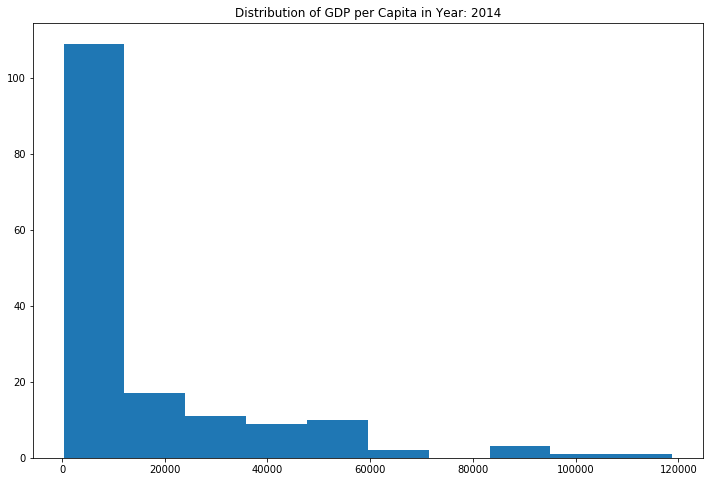

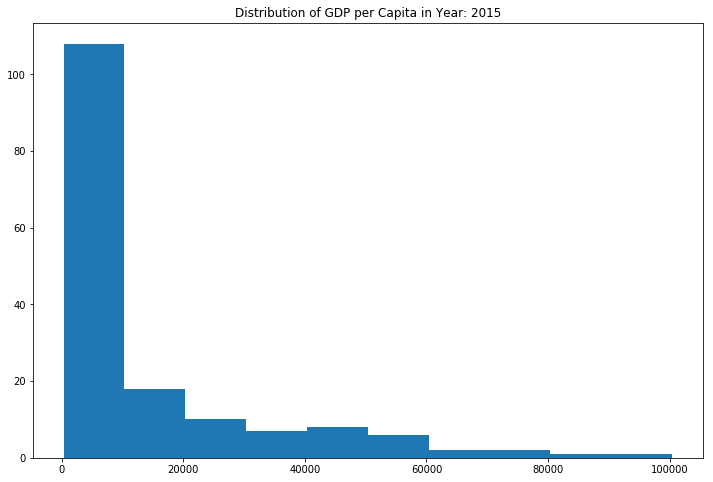

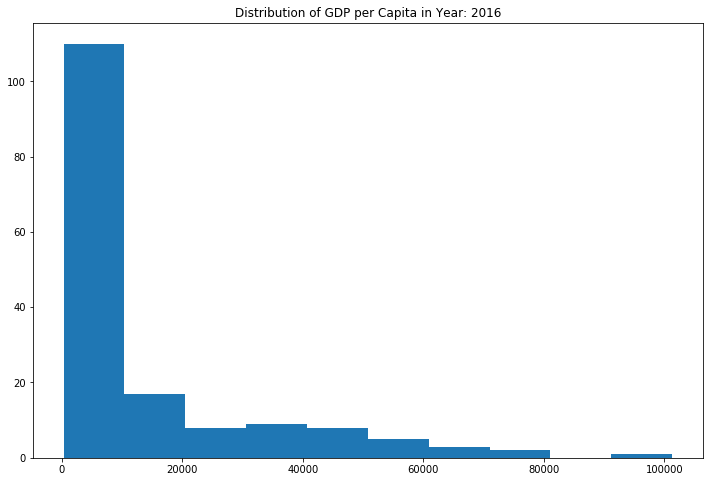

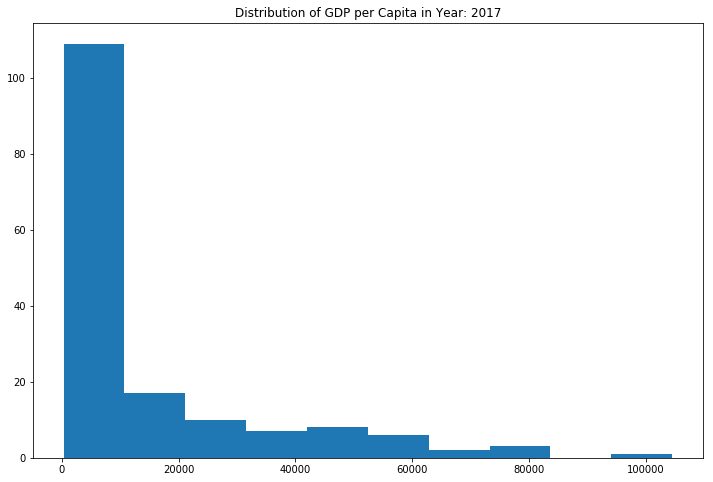

In [13]:
disp_histograms(comb, gdppc_cols, 'GDP per Capita', 1990)

The distribution of GDP per capita looks a lot better from a modeling standpoint after the natural logarithmic transformation.

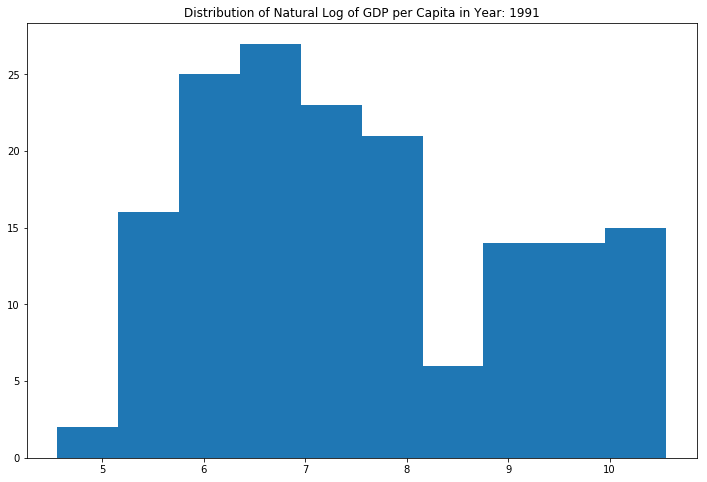

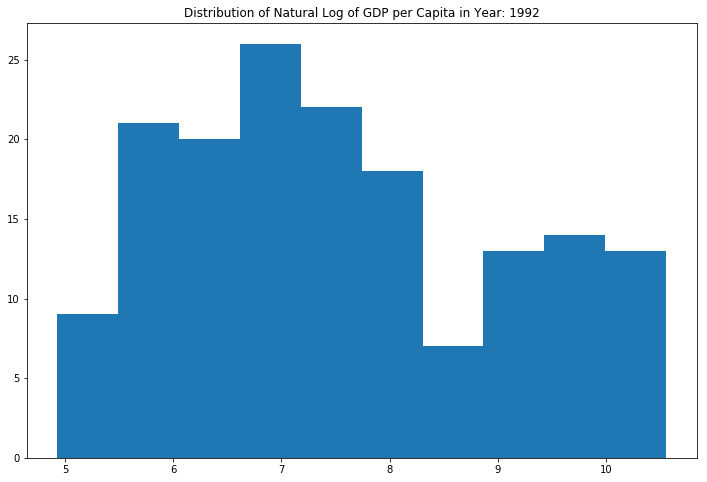

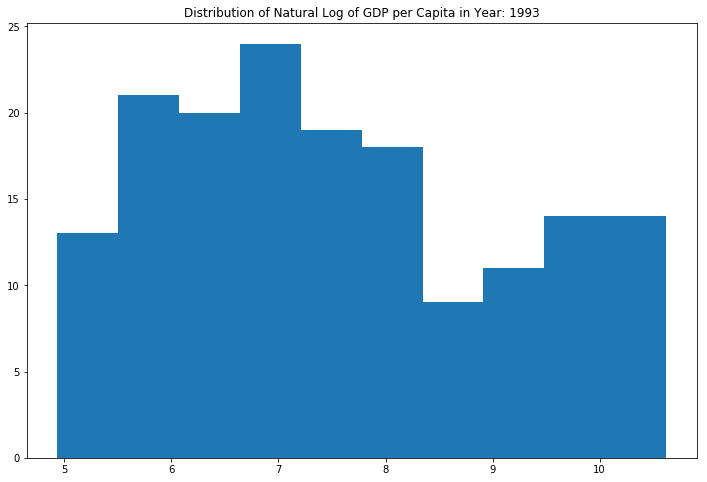

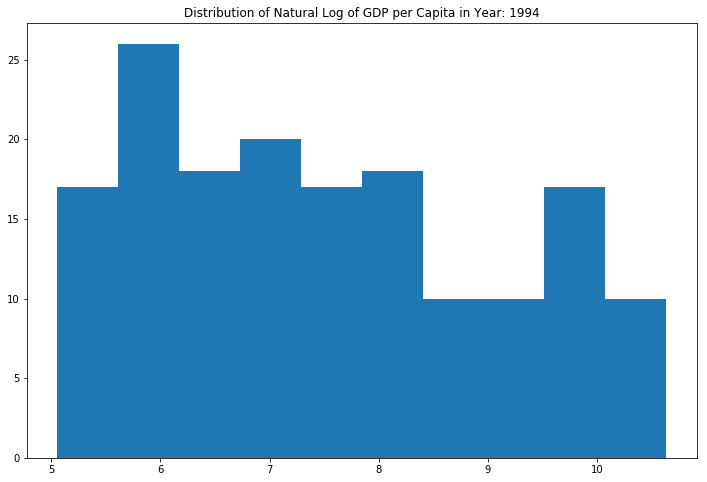

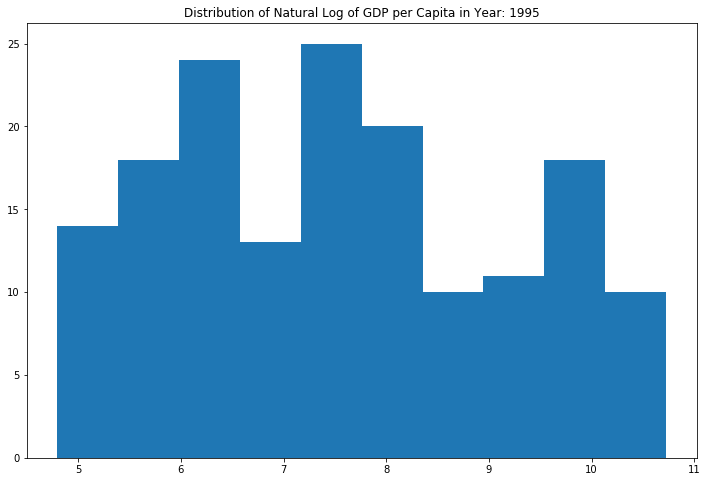

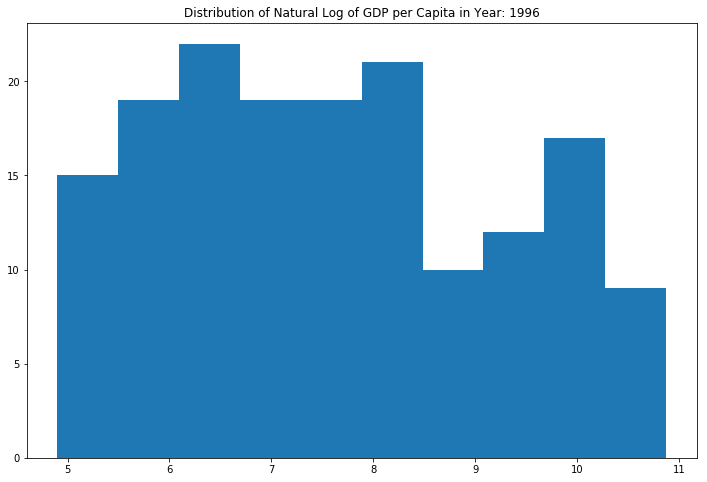

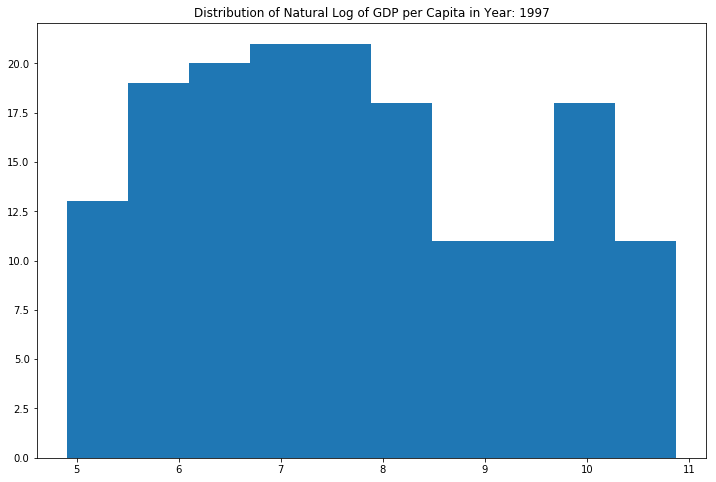

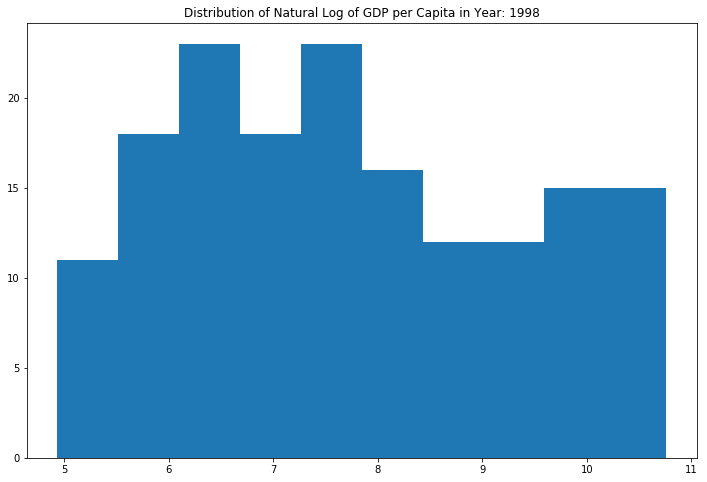

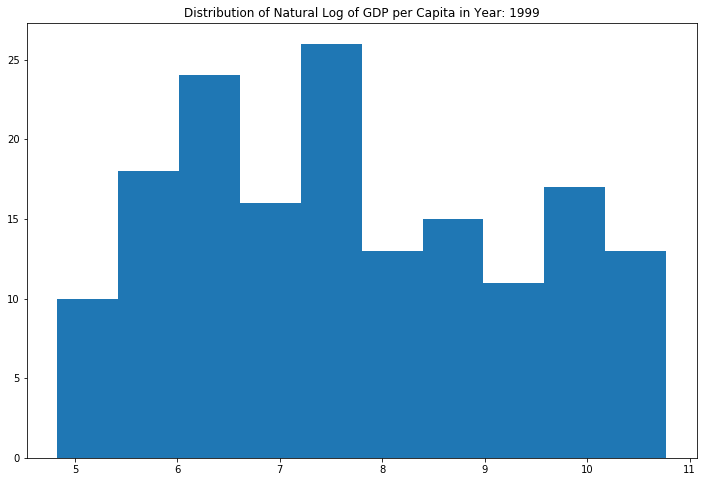

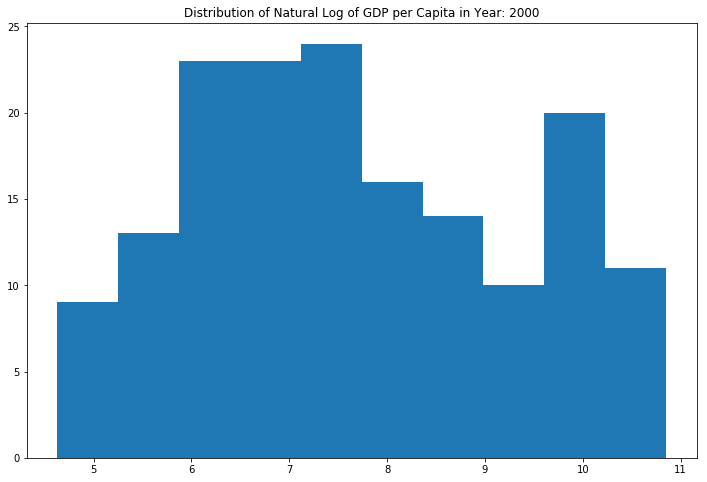

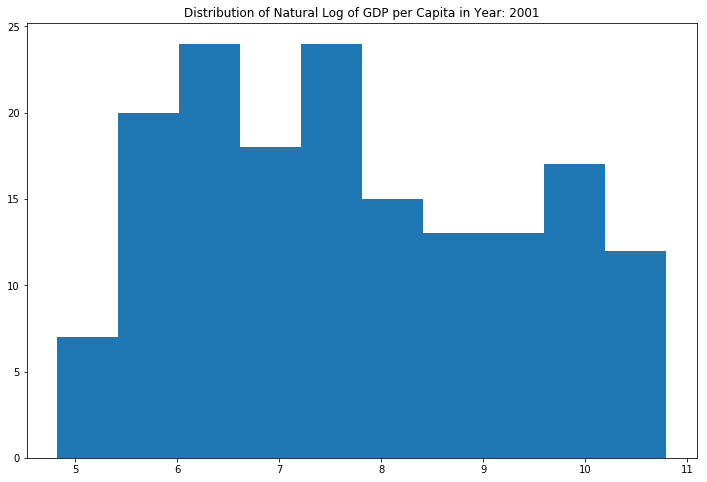

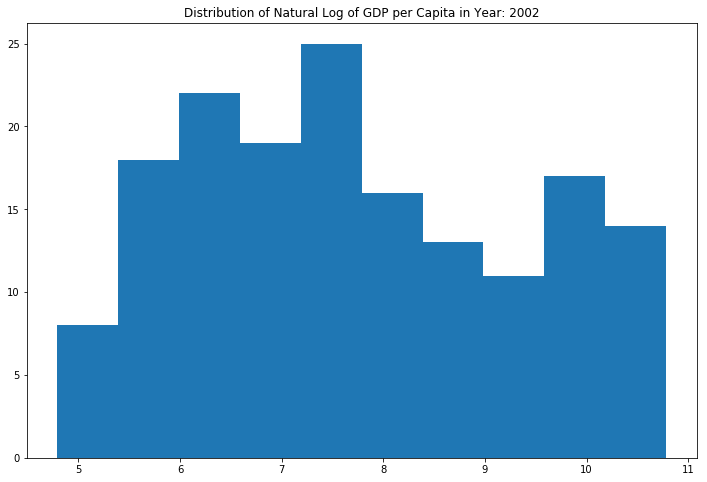

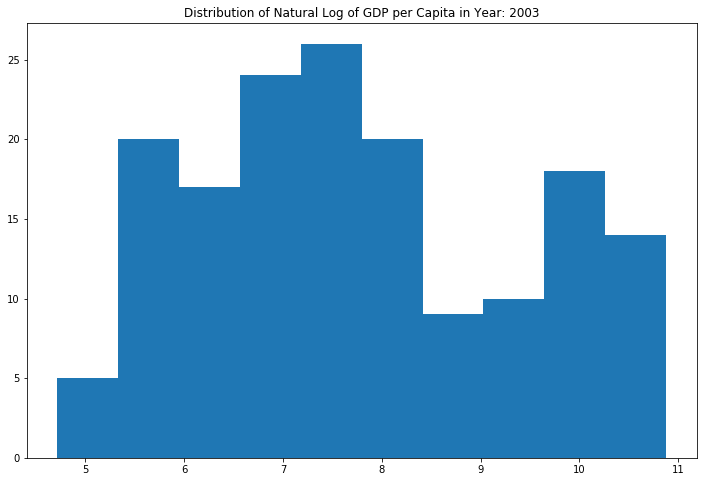

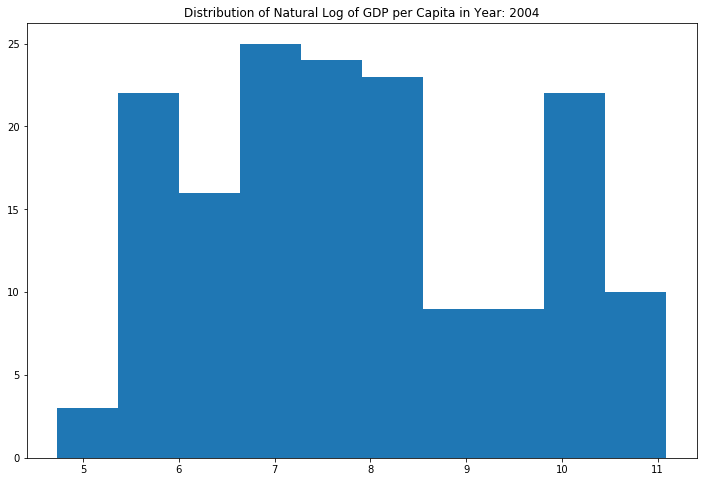

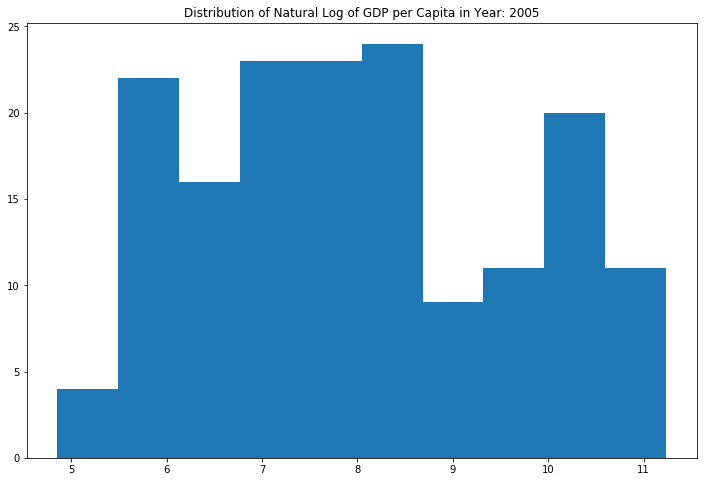

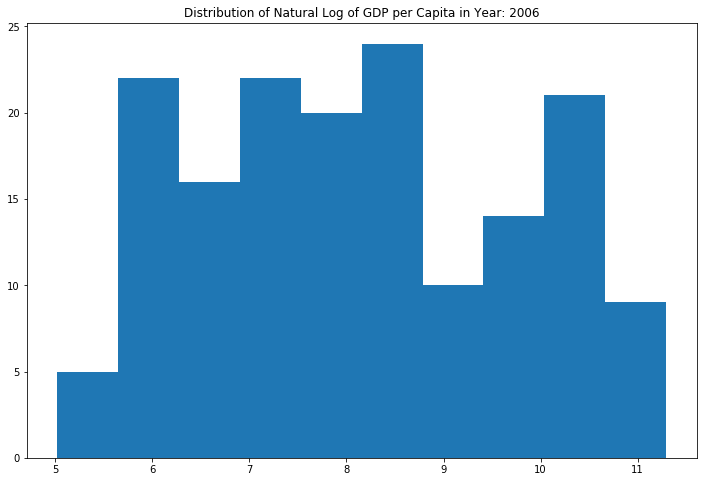

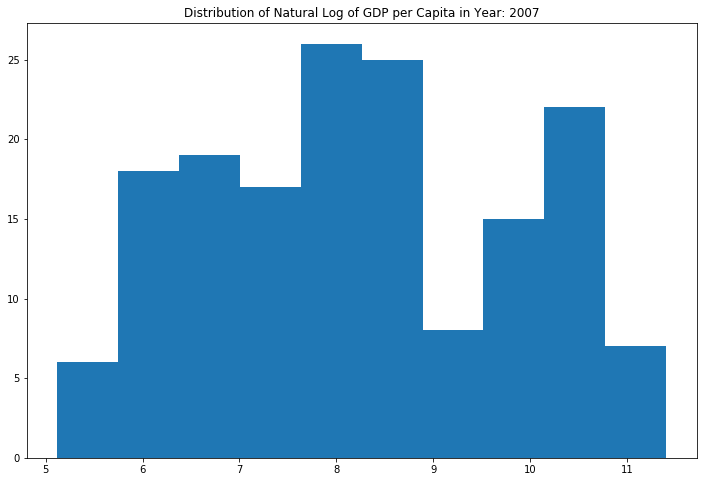

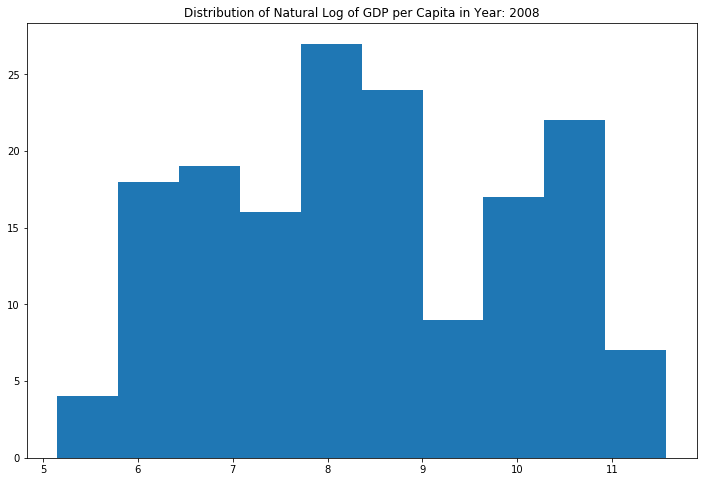

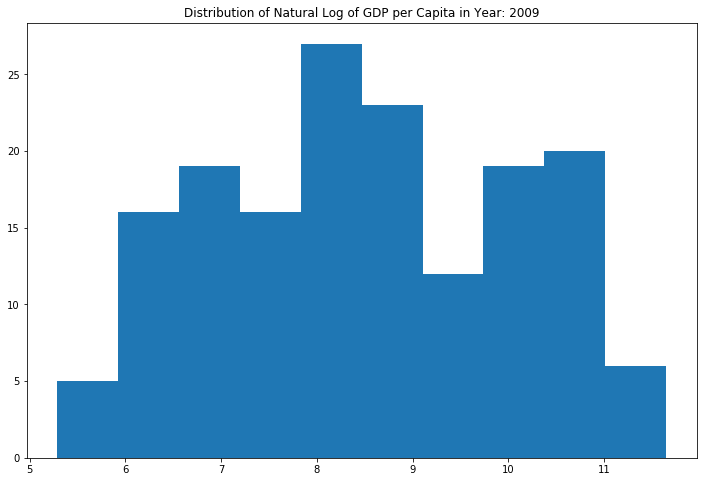

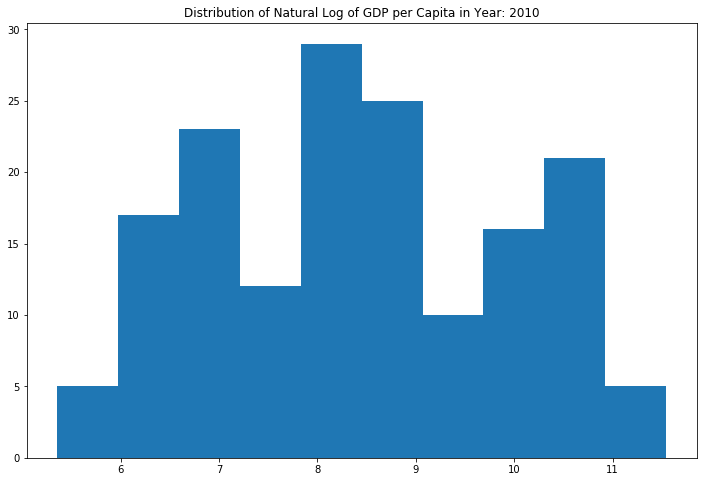

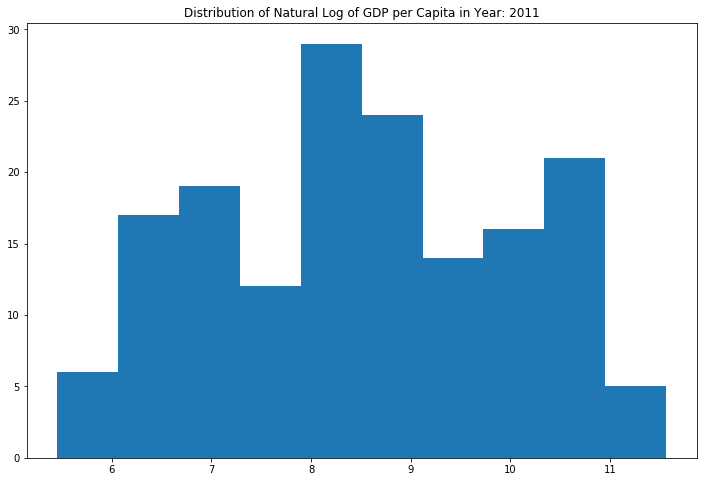

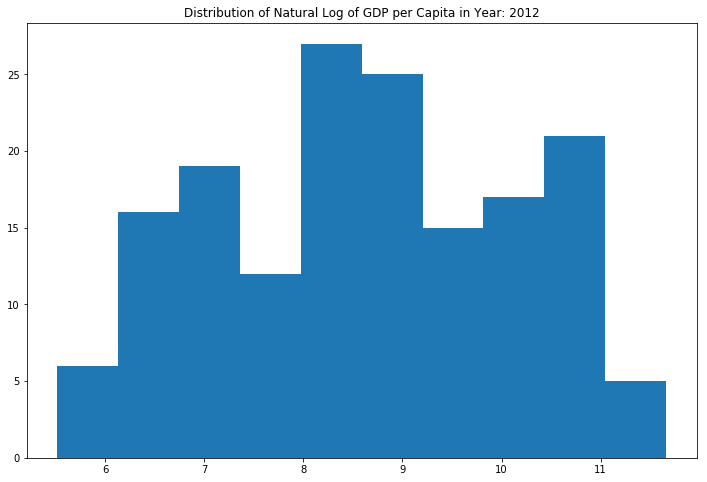

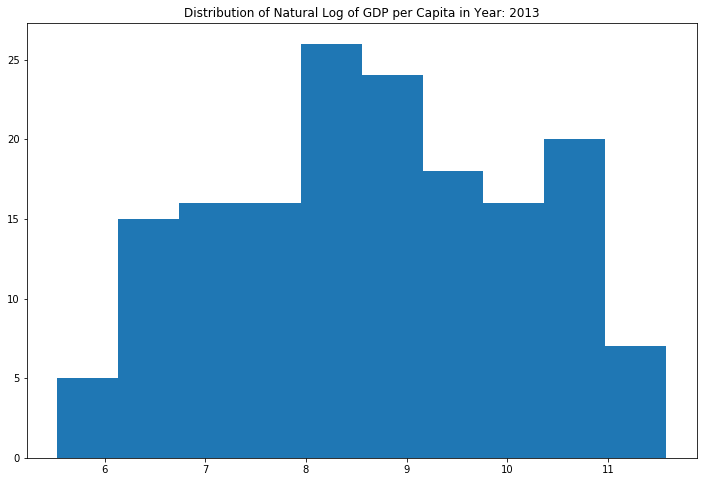

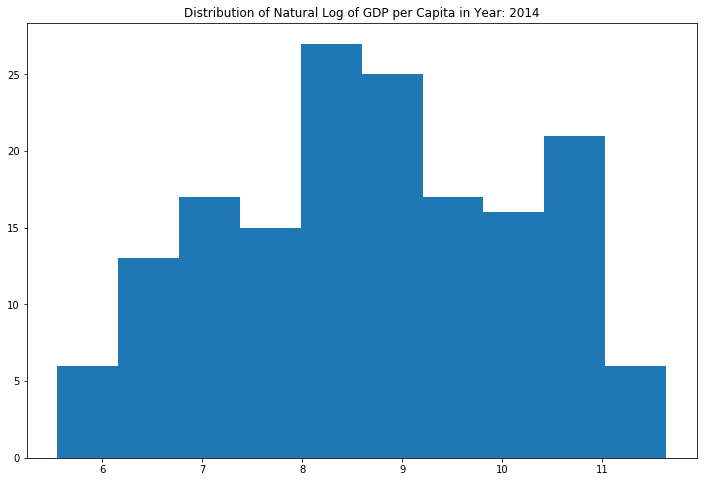

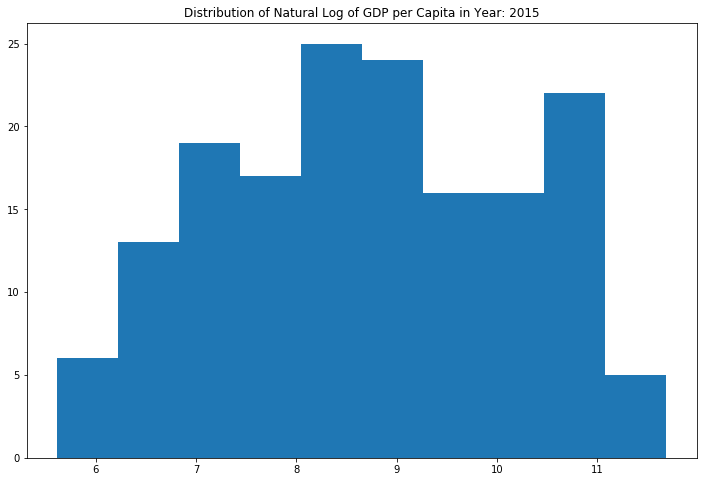

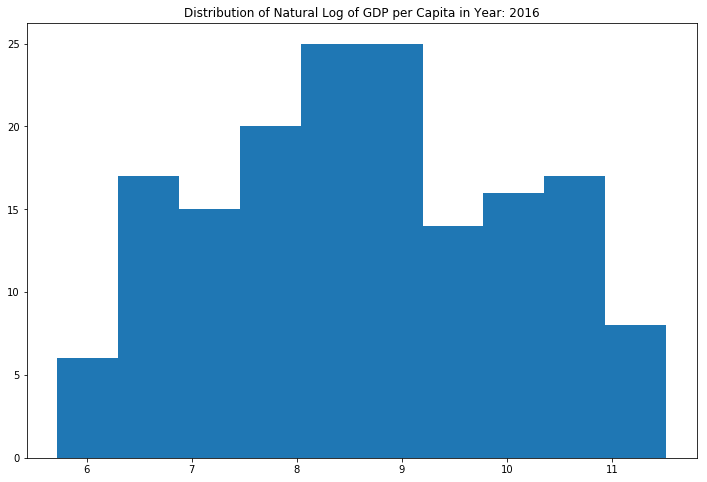

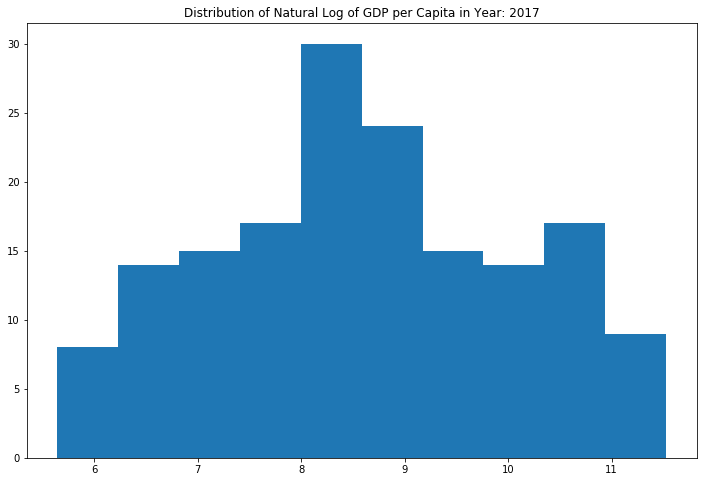

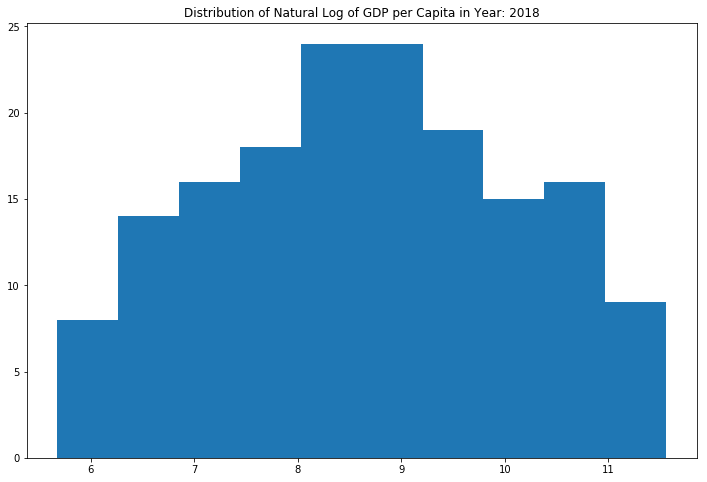

In [14]:
# takes the natural logarithm of the GDP per capita columns
for col in gdppc_cols:
    comb[col] = np.log(comb[col])

disp_histograms(comb, gdppc_cols, 'Natural Log of GDP per Capita', 1991)

#### **I also add a squared term to account for possible diminishing returns to life expectancy from GDP per capita.**

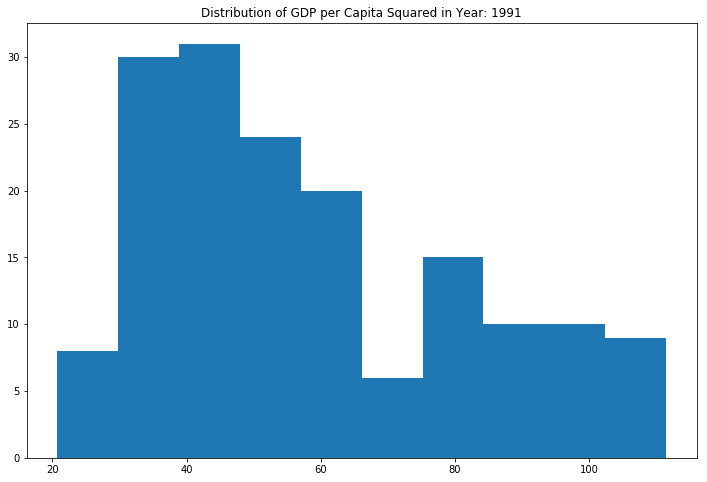

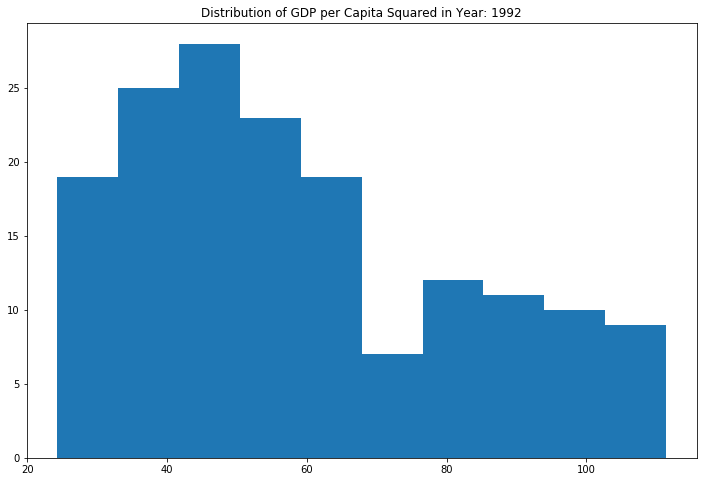

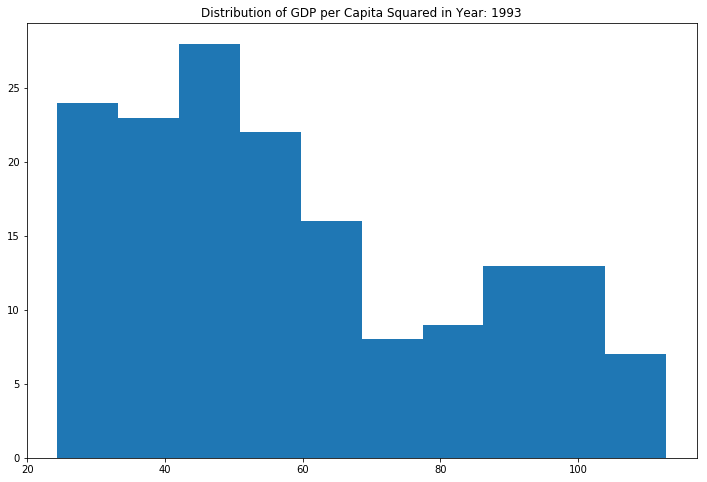

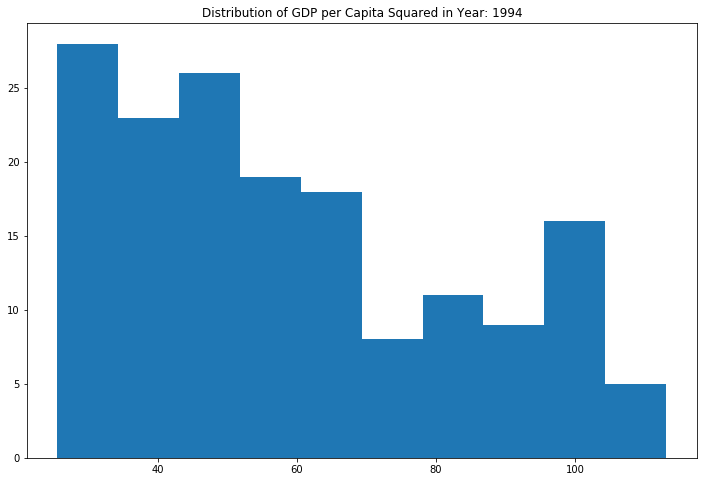

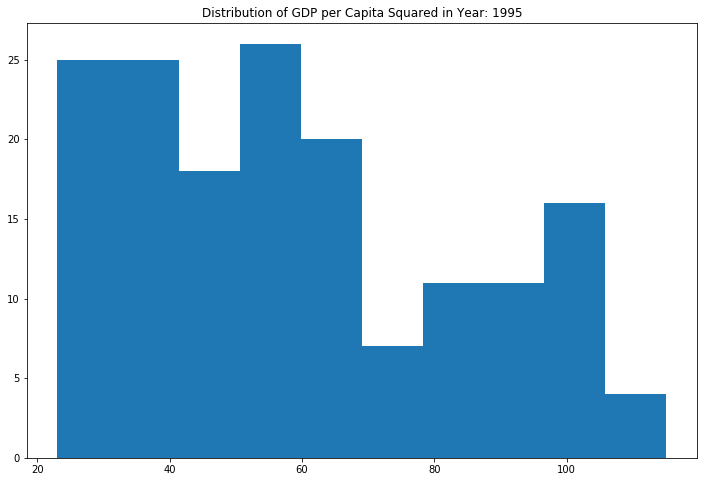

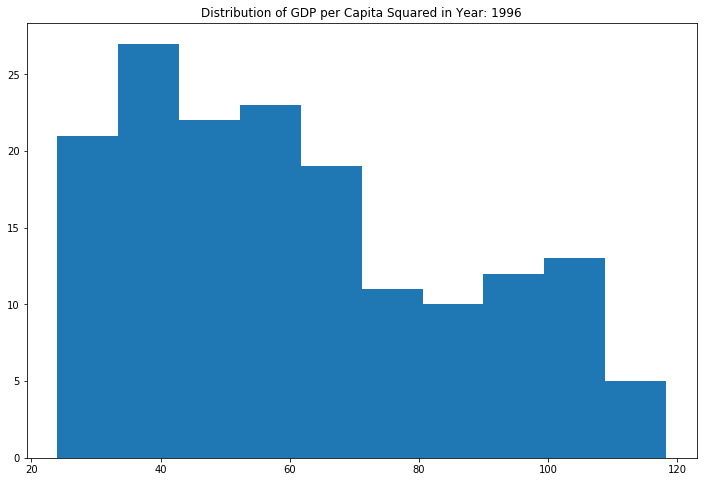

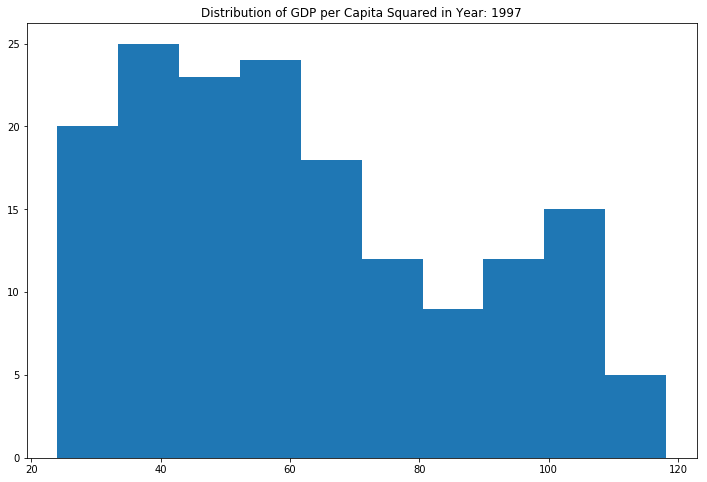

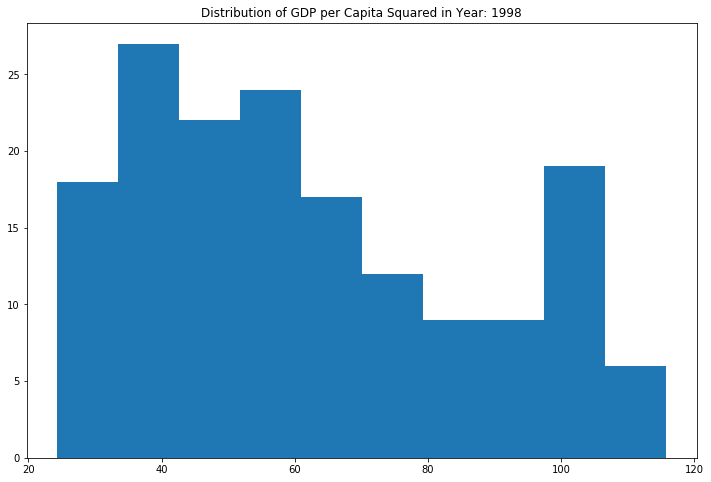

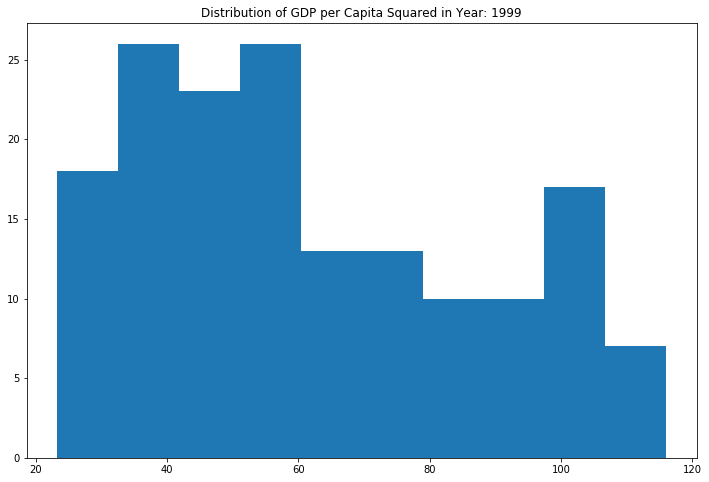

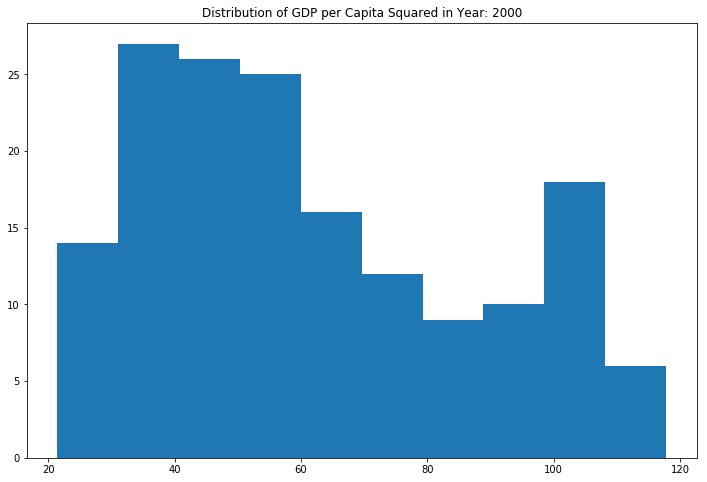

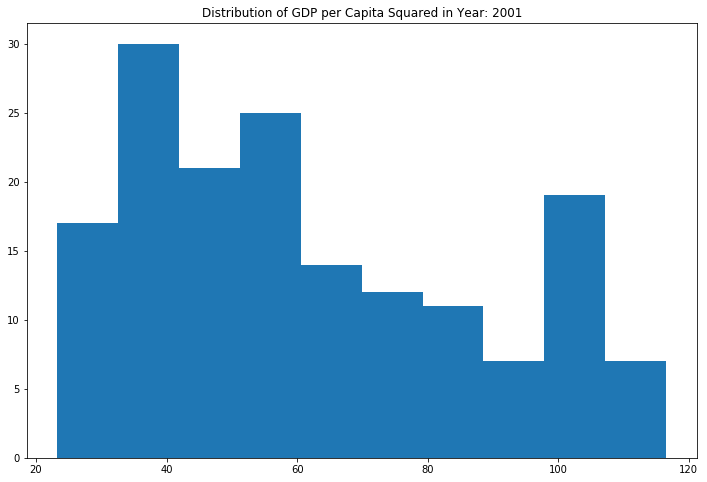

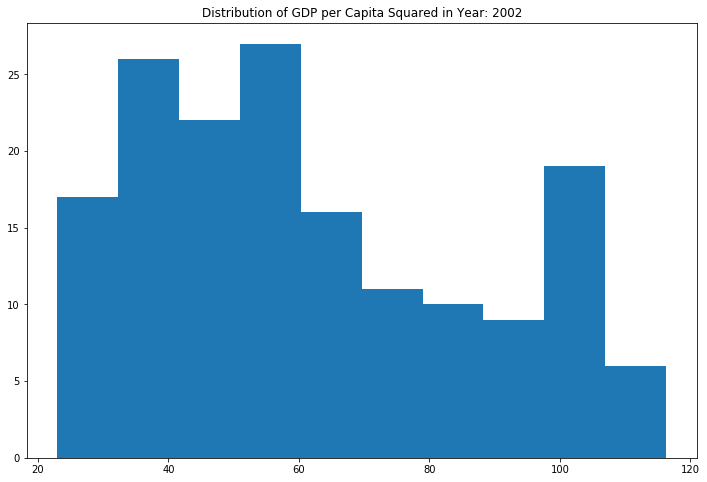

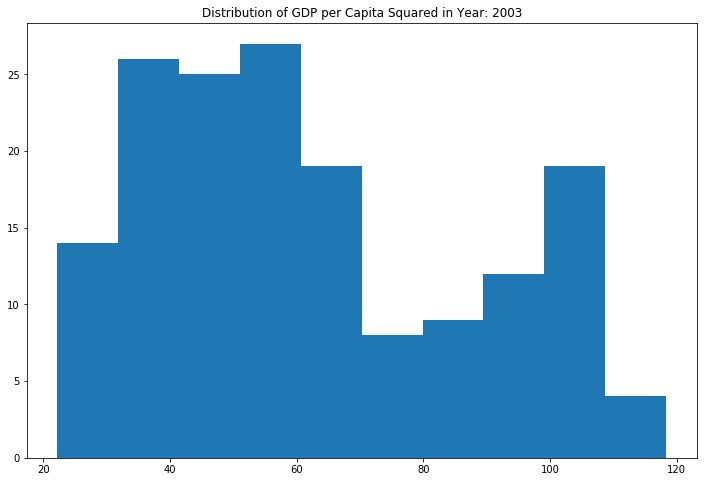

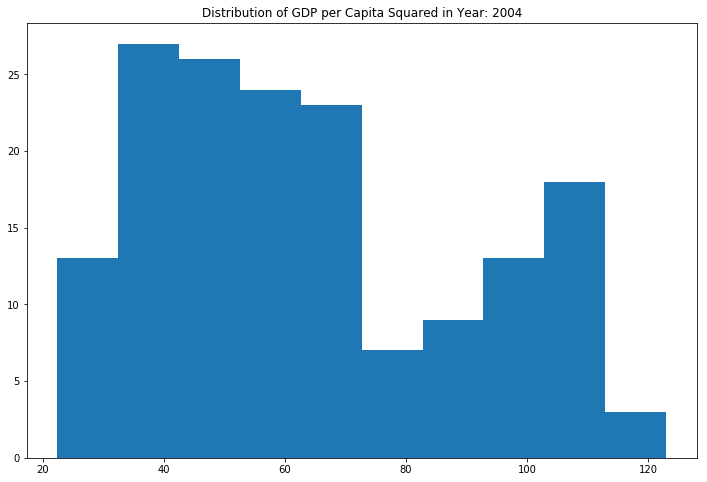

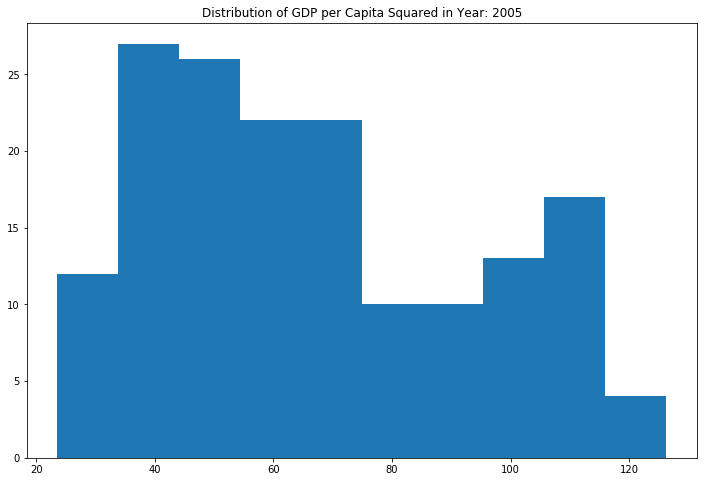

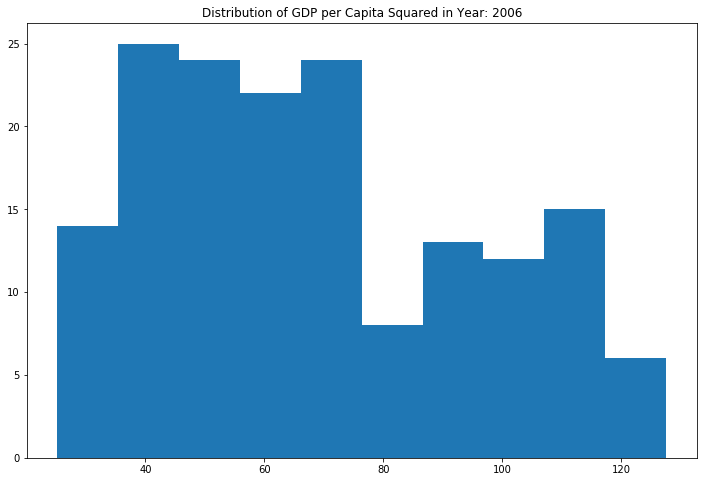

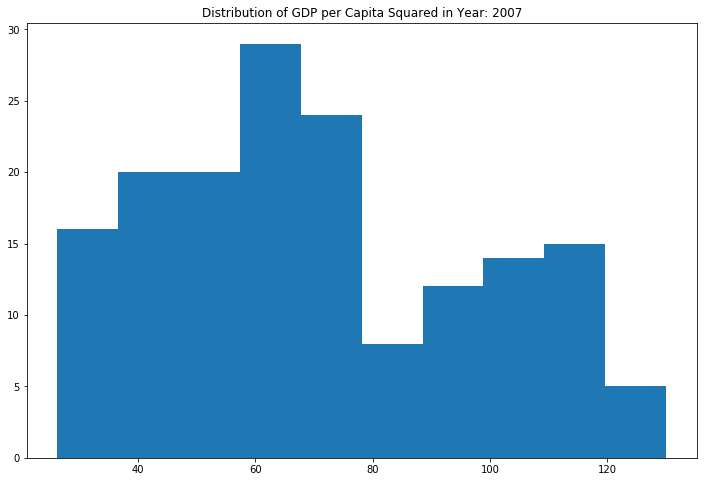

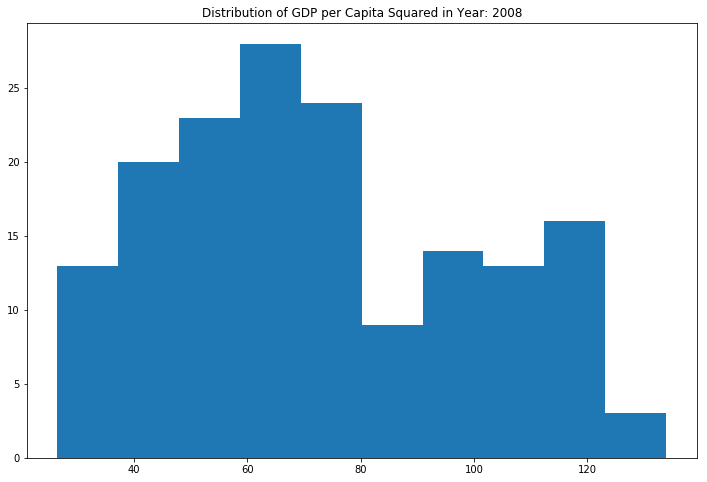

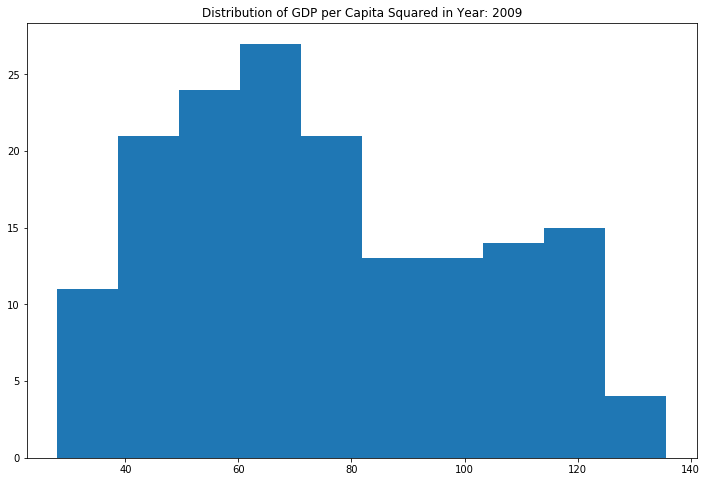

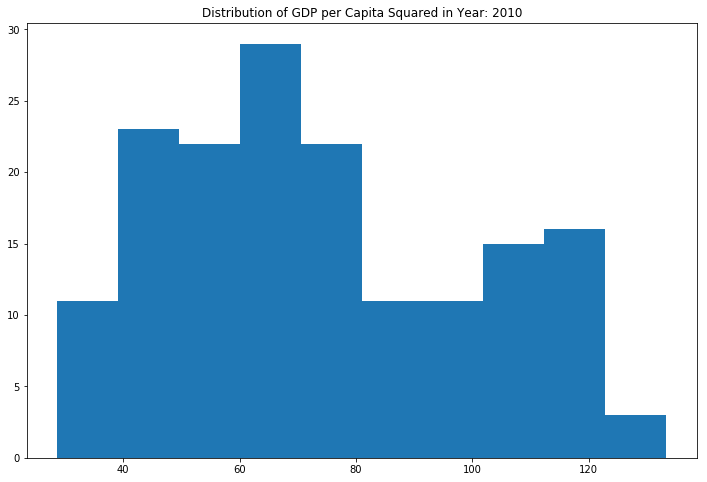

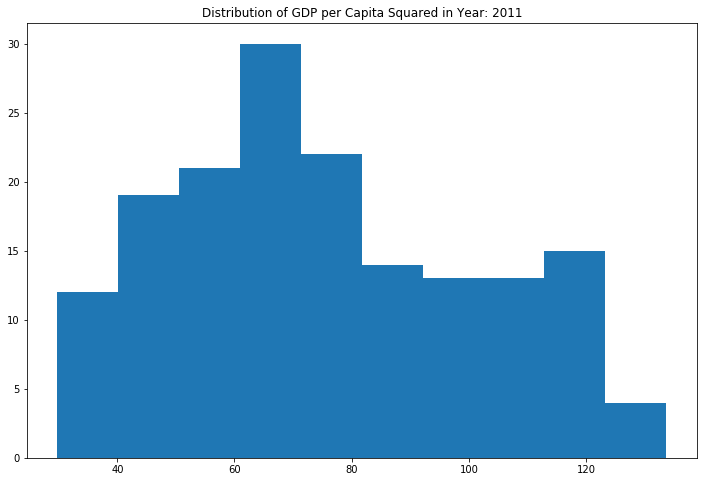

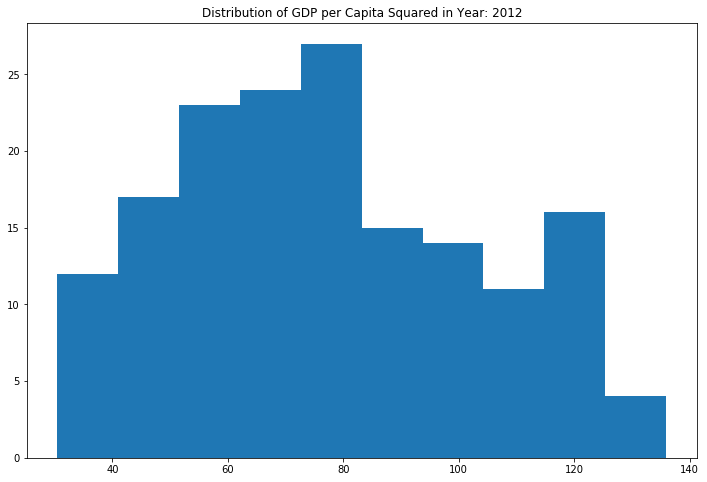

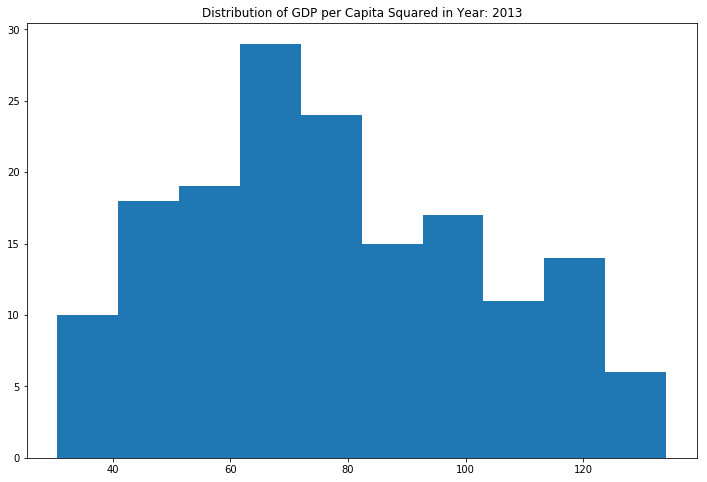

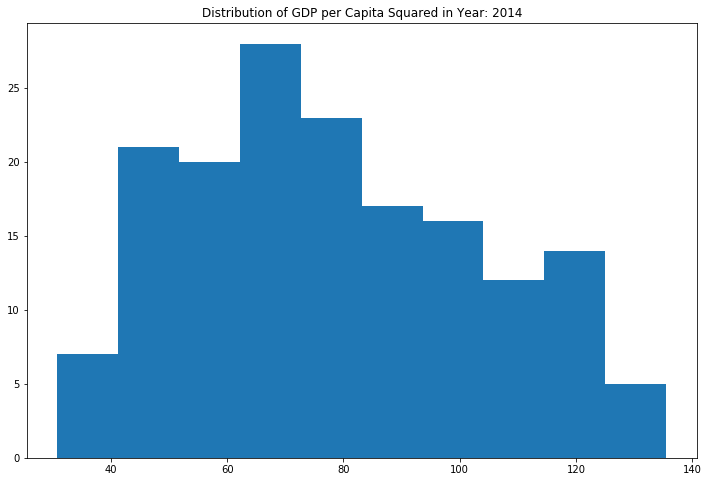

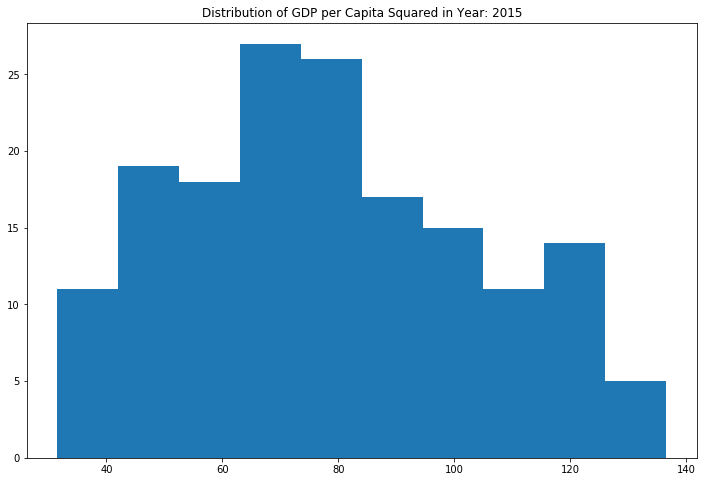

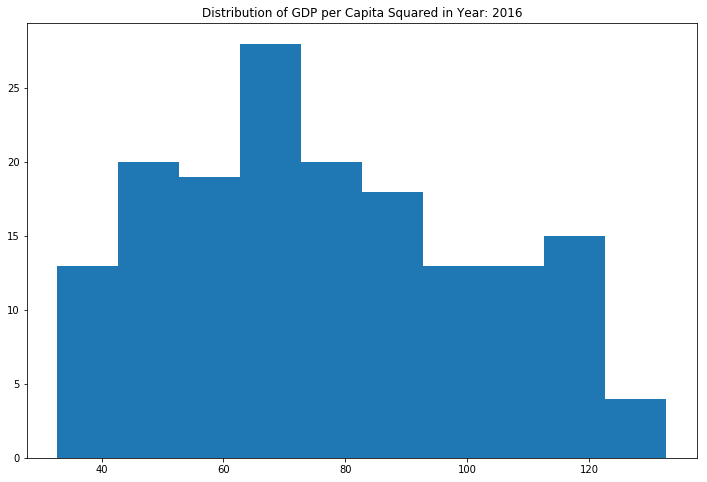

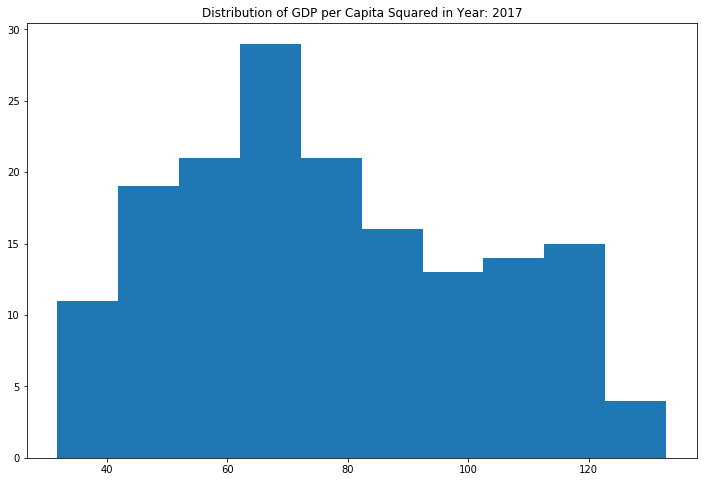

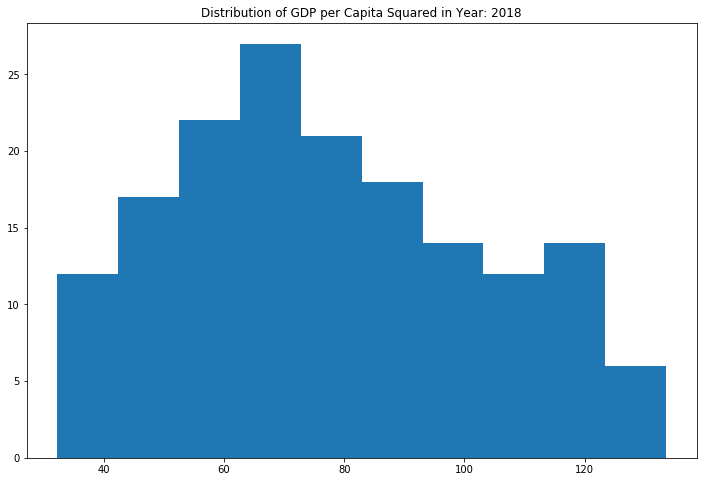

In [15]:
# creates columns of the squared natural log of gdppc columns
sq_gdppc_cols = []
for col in gdppc_cols:
    newvar = col + '_sq'
    comb[newvar] = comb[col] ** 2
    sq_gdppc_cols.append(newvar)

disp_histograms(comb, sq_gdppc_cols, 'GDP per Capita Squared', 1991)

## **IV. Modeling**

Here I define some functions to make repeated model estimation and graphing easier.

In [16]:
'''intakes the year of the regression, which is an integer
y, the target variable, which is a string, 
X, which is a list of independent variables,
and the pandas dataframe'''

# define the function and its inputs
def linreg(year, y_variable, X_variables, data, heteroskedasticity_robust):
    
    # converts the year to a string
    year = str(year)
    
    # creates the column name of the target variable
    y_var = str(year) + '_' + y_variable
    
    # creates a dataframe of the y variable
    y = pd.DataFrame(data[y_var])

    # creates a list of the properly named X variables
    X_vars = []
    # loops through the variables in the X list
    for i in X_variables:
        # creates the X variable with the proper name made from the year and variable name
        temp_var = str(year) + '_' + i
        # appends it to the list of independent variables
        X_vars.append(temp_var)
    
    # creates a dataframe of the independent variables
    X = data[X_vars]
    
    
    # imports statsmodels as sm
    import statsmodels.api as sm
    
    if heteroskedasticity_robust == True:
        # fits the model
        model = sm.OLS(y, X).fit(cov_type = 'HC3')
    else:
        # fits the model
        model = sm.OLS(y, X).fit()
    
    # retruns the model
    return(model)



'''Defines a function to perform repeated regression and outputs a list of those regression
models.'''

# defines the function's inputs
def repeated_linreg(start_year, end_year, y_variable, X_variables, data, 
                    heteroskedasticity_robust):
    
    # creates a list of models to hold lists
    model_list = []
    # loops from the start_year to end year
    for i in range(start_year, end_year + 1):
        # performs linreg at year i of the y_variable on the X_variables and appends the 
        # model to the model_list
        model_list.append(linreg(i, y_variable, X_variables, data, 
                                 heteroskedasticity_robust))
    
    # returns the model_list
    return(model_list)


'''Defines a function to plot coefficients with their error bars over time.'''
# defines a function and its inputs
def plot_coef(start_year, end_year, y_variable, X_variables, data, 
                    heteroskedasticity_robust):
    # gets a list of the models estimated at cross-sections of our data
    model_list = repeated_linreg(start_year, end_year, y_variable, X_variables, data, 
                    heteroskedasticity_robust)
    
    # imports matplotlib.pyplot as plt for plotting purposes
    import matplotlib.pyplot as plt
    # this chunk plots the coefficients with standard errors
    for i in range(len(X_variables)):
        # creates empty lists of coefficients and standard errors to hold at different times
        coefs = []
        stderr = []
        # loops through the models at each year and appends the coefficients and standard
        # errors
        for j in range(len(model_list)):
            coefs.append(model_list[j].params[i])
            stderr.append(model_list[j].bse[i])
            
        # plots the coeffients in each period along with its standard error
        plt.errorbar(range(start_year, end_year + 1), coefs, yerr = stderr)
    
        # generates and plots a red horizontal dotted line; if the error bar doesn't touch  
        # it, the coefficient is significant at the alpha = 0.05 level
        horiz_line_data = np.array([0 for i in range(start_year + 1, end_year + 1)])
        plt.plot(range(start_year, end_year), horiz_line_data, 'r--')
    
        # adds a title
        plt.title('Coefficient of ' + X_variables[i] + ' With Error Bars Over Time')
        # displays the plot
        plt.show()
    return()


'''This function performs repeated Breusch-Pagan F-tests to test for heteroskedasticity 
in the repeated linear regressions'''

# defines the function and its inputs
def repeated_breusch_pagan_Ftest(start_year, end_year, y_variable, X_variables, data, 
                    heteroskedasticity_robust):
    
    # imports the Breusch-Pagan test for heteroskedasticity
    from statsmodels.stats.diagnostic import het_breuschpagan as hbp
    
    # gets a list of models estimated at each cross-section
    model_list = repeated_linreg(start_year, end_year, y_variable, X_variables, data, 
                    heteroskedasticity_robust)
    
    # creates an empty list that will hold tuples of the BP test statistic and its 
    # associated p-value based on the results of an F-test
    bp_stats = []
    # loops through the targeted years
    for year in range(start_year, end_year + 1):
        
        # creates an empty list that will hold the column names of the independent 
        # variables in each year
        indep_var_names = []
        # loops through the elements in the X_variables list
        for indep_var in X_variables:
            # adds the year plus an underscore to match the column formatting I chose in 
            # this project
            indep_var_names.append(str(year) + '_' + indep_var)
        # creates a dataframe of the independent variables
        X = data[indep_var_names]
        
        # creates an empty dataframe to hold my residuals info
        resid_df = pd.DataFrame()
        # creates a column of the actual y_values
        resid_df['y'] = data[str(year) + '_' + y_variable].values.tolist()
        # creates a list of the in-sample predictions aka yhats
        yhats = model_list[year - start_year].predict()
        # creates a column from those yhats
        resid_df['yhat'] = yhats
        # calculates the residuals
        resid_df['residuals'] = resid_df.y - resid_df.yhat
        # appends the results of a BP F-test for heteroskedasticity
        bp_stats.append(hbp(resid_df['residuals'], X)[2:])
        
    # returns the list of test-stats and p-values
    return(bp_stats)

### **A. Regressing Life Expectancy on $ln($GDP per Capita$)$ and $ln($GDP per Capita$)^2$**

The residuals of this model seem mildly skewed left from 1990 to 2003 and a strong left skew after that with kurtosis in excess of the normal distribution. In English, this means that the residuals have long left-tails. The output of the Breusch-Pagan heteroskedasticity tests give strong evidence of heteroskedasticity in the residuals, but I used heteroskedasticity robust standard errors to be sure the model didn't underestimate the standard errors of the coefficients. So our residuals are not normally or identically distributed. The Durbin-Watson statistic remains close to 2, so at least there doesn't appear to be autocorrelation in our residuals.

The R-squred of these regressions is absurdly high, ranging from 0.992 to 0.997 meaning between 99.2% to 99.7% of the variation in life expectancy is explained by this model specification.

The coefficients in this model are significant in each year and confirm my first hypothesis. That there are postive, but decreasing returns to life expectancy from increases in GDP per capita. Plotting the coefficients with their 95% confidence interval bars over the sample period show they appear stable over time. There isn't any evidence to suggest the relationship between life expectancy and GDP per capita has changed over the 27 year period.

In [28]:
my_models = repeated_linreg(1990, 2017, 'lifexp', ['gdppc', 'gdppc_sq'], comb, 
                                       True)

for i in my_models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:            1990_lifexp   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.631e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          3.13e-203
Time:                        21:43:26   Log-Likelihood:                -517.22
No. Observations:                 163   AIC:                             1038.
Df Residuals:                     161   BIC:                             1045.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
1990_gdppc       12.0846      0.366     33.026

                            OLS Regression Results                            
Dep. Variable:            2002_lifexp   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.254e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          7.50e-198
Time:                        21:43:26   Log-Likelihood:                -525.35
No. Observations:                 163   AIC:                             1055.
Df Residuals:                     161   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
2002_gdppc       12.4058      0.339     36.577

In [18]:
repeated_breusch_pagan_Ftest(1990, 2017, 'lifexp', ['gdppc', 'gdppc_sq'], comb, 
                                       True)   

[(25.17639886945831, 3.0643539910055225e-10),
 (27.561586375238637, 5.081893913588585e-11),
 (23.344953636477463, 1.2518258913571316e-09),
 (22.859804964564514, 1.8249796936377144e-09),
 (30.521774219252446, 5.770470340582558e-12),
 (32.866503394013435, 1.072866920594634e-12),
 (39.9620273535705, 8.09337840557418e-15),
 (41.07747479570243, 3.853827878437213e-15),
 (42.97496458776188, 1.1078120687345955e-15),
 (38.360195994710004, 2.3775780590986352e-14),
 (33.97658183173349, 4.896410030078323e-13),
 (31.313692353571067, 3.2562800122080476e-12),
 (32.70556787684378, 1.2028499828394012e-12),
 (28.60757149833716, 2.3401827395732646e-11),
 (25.735576013651187, 2.0037116397655646e-10),
 (23.274475841709982, 1.3221454001751127e-09),
 (23.044832576082566, 1.5802643275116487e-09),
 (22.233108095851723, 2.9776863931098e-09),
 (21.39378799651711, 5.7633884026076064e-09),
 (21.29602082836885, 6.226425783866143e-09),
 (20.81269659948382, 9.133272933230091e-09),
 (20.430911681822753, 1.237714790241

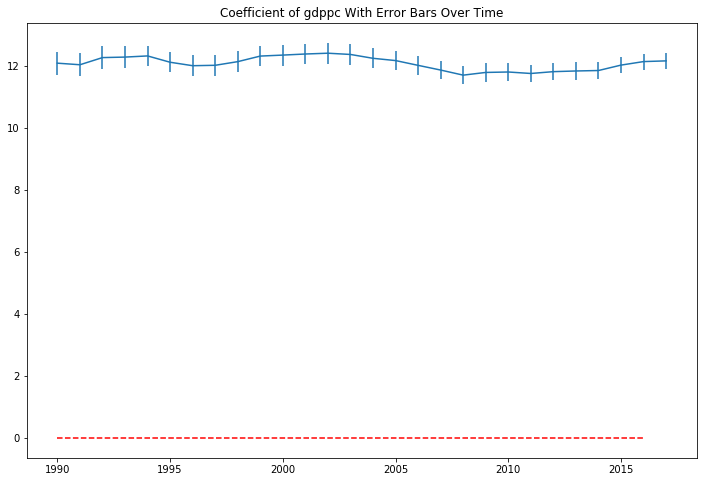

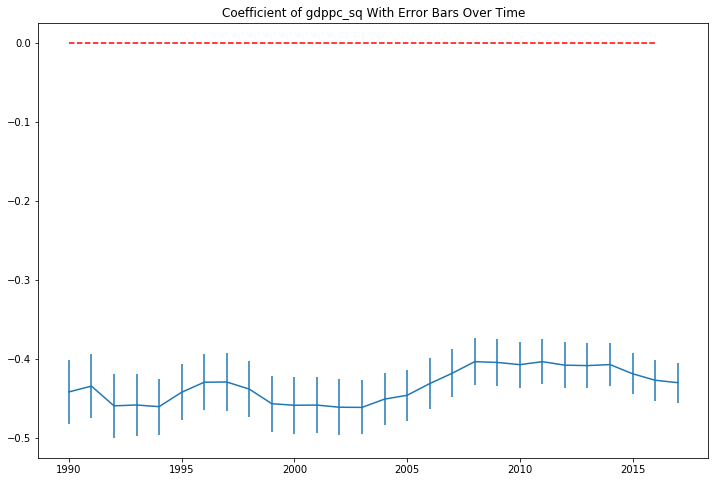

In [29]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

plot_coef(1990, 2017, 'lifexp', ['gdppc', 'gdppc_sq'], comb, 
                                       True);   

### **A. Regressing $ln($GDP per Capita$)$ on Life Expectancy and Life Expectancy$^2$**

The residuals of this model seem approximately symmetric throughout the entire period as the skewness stays between -0.5 and 0.5. The kurtosis remains fairly close to that of the normal distribution, but does exceed it in some periods. The Jarque-Bera test for normality fails to reject the null-hypothesis of normality from 1993 to 2007 and from 2015 to 2017. Perhaps this is somewhat related to the 2007 financial crisis and the recovery. The output of the Breusch-Pagan heteroskedasticity tests give strong evidence of heteroskedasticity in the residuals, but I used heteroskedasticity robust standard errors to be sure the model didn't underestimate the standard errors of the coefficients. So our residuals are occasionally not normally or identically distributed in our sample period. The Durbin-Watson statistic remains close to 2, so at least there doesn't appear to be autocorrelation in our residuals.

The R-squred of these regressions is, again, absurdly high, ranging from 0.985 to 0.993, meaning between 98.5% to 99.3% of the variation in the natural log of GDP per capita is explained by this model specification.

The coefficients in this model are significant in each year, but are both positive, disproving my second hypothesis. There are postive, and increasing returns to the $ln($GDP per capita$)$ from increases in life expectancy. Plotting the coefficients with their 95% confidence interval bars over the sample period show they appear somewhat volatile over time. There doesn't seem to be a straight line that intersects all of the confidence intervals. In a 27 sample peiod, we would expect a 95% confidence interval to not contain the true parameter 0.05x27 = 1.35 times, but it seems 3 or 4 periods might barely miss a horizontal line that tries to hit as many intervals as possible. Still, this isn't conclusive evidence that the relationship between GDP per capita and life expectancy has changed over the 27 year period.

In [20]:
my_models = repeated_linreg(1990, 2017, 'gdppc', ['lifexp', 'lifexp_sq'], comb, 
                                       True)

for i in my_models:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:             1990_gdppc   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5755.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          1.76e-150
Time:                        19:10:25   Log-Likelihood:                -212.22
No. Observations:                 163   AIC:                             428.4
Df Residuals:                     161   BIC:                             434.6
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
1990_lifexp        0.0999      0.008     11.

                            OLS Regression Results                            
Dep. Variable:             2012_gdppc   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          4.84e-171
Time:                        19:10:25   Log-Likelihood:                -206.06
No. Observations:                 163   AIC:                             416.1
Df Residuals:                     161   BIC:                             422.3
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
2012_lifexp        0.0969      0.011      9.

In [21]:
repeated_breusch_pagan_Ftest(1990, 2017, 'gdppc', ['lifexp', 'lifexp_sq'], comb, 
                                       True)

[(26.77693690862168, 9.1370504470779e-11),
 (29.986092208463738, 8.517369790940007e-12),
 (26.68172763748154, 9.814038301458174e-11),
 (28.959262400927745, 1.806095570949201e-11),
 (33.774063679619815, 5.646519235326066e-13),
 (36.6829677851136, 7.464087127550792e-14),
 (41.3172964201161, 3.2884963076540353e-15),
 (41.49435022591383, 2.925641143676855e-15),
 (43.73939552694402, 6.740503331022364e-16),
 (41.911171311935504, 2.2231745224749696e-15),
 (40.917083699106286, 4.285926104186665e-15),
 (42.294105876470944, 1.7289320187449001e-15),
 (46.44179233488748, 1.1923286474897728e-16),
 (45.88057466550203, 1.703343123443985e-16),
 (45.01215640382425, 2.9673049385154193e-16),
 (43.08150736322747, 1.0335049817195517e-15),
 (42.03769916991336, 2.045765195707242e-15),
 (39.30341884559537, 1.2583365862057021e-14),
 (36.343654071259515, 9.426606581213953e-14),
 (36.3328550959465, 9.497005405141103e-14),
 (37.11983461933329, 5.5320097090063094e-14),
 (35.241821463185495, 2.0211483766206058e-13)

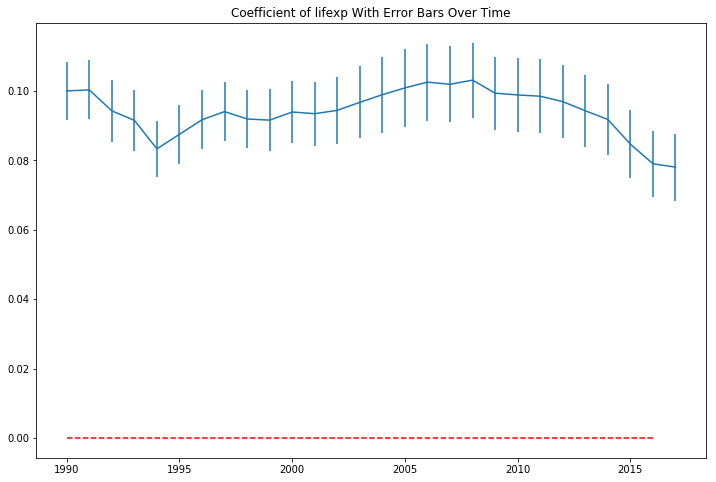

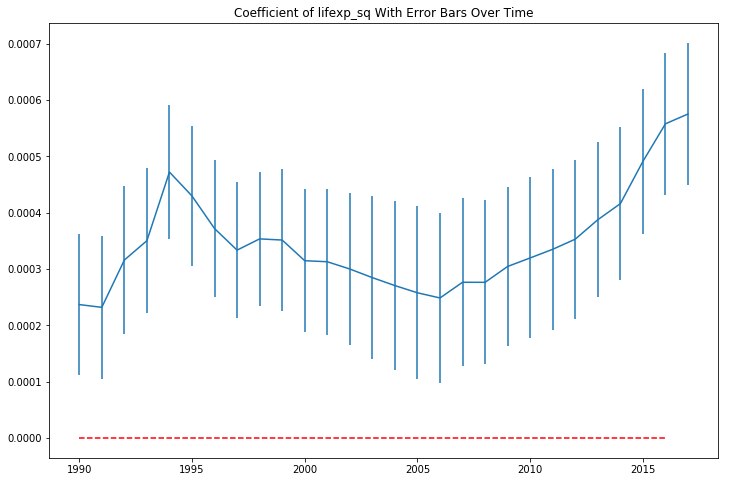

()

In [22]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

plot_coef(1990, 2017, 'gdppc', ['lifexp', 'lifexp_sq'], comb, 
                                       True)   

## **V. Conclusions**

Looking at a scatter plot for the most recent data (2017) along with the regression lines show that the variables have a relationship with each other and the regressions are good fits. Also, there is more variability among the lower and middle income countries than the the high income countries. Explaining the differences between low and middle income countries with higher levels of life expectancy versus lower life expectancy levels seems an interesting avenue of research that could provide important insights into interventions that could help improve people's lives.

The way to interpret the coefficients in the 2017 model regressing life expectancy on $ln(GDP per capita)$ and $ln(GDP per capita)^2$ is a 1% increase in GDP per capita leads to a $\frac{12.1586 - 2*0.4300 * ln(GDP per capita)}{100}$ year increase in life expectancy. This combines the level-log coefficient interpretation with the interpretation of coefficients as marginal effects, aka partial derivatives, of the dependent variable with respect to the independent variable in question.

Generically, an increase in 1% in GDP per capita leads to a $\frac{B_1 + 2* B_2 * ln(GDP per capita)}{100}$ year increase in life expectancy, where $B_1$ is the coefficient of the non-squared term and $B_2$ is the coefficient of the squared term. $B_1 + 2* B_2 * ln(GDP per capita)$ is the partial derivative of life expectancy with respect to $ln(GDP per capita)$. All regression coefficients are partial derivatives, I just want to emphasize that with higher order terms. You cannot correctly interpret the coeffient of $x$ separately from $x^n$, where n is not 1 or 0.

                            OLS Regression Results                            
Dep. Variable:            2017_lifexp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.590e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          4.48e-214
Time:                        19:10:26   Log-Likelihood:                -467.28
No. Observations:                 163   AIC:                             938.6
Df Residuals:                     161   BIC:                             944.7
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
2017_gdppc       12.1586      0.252     48.237

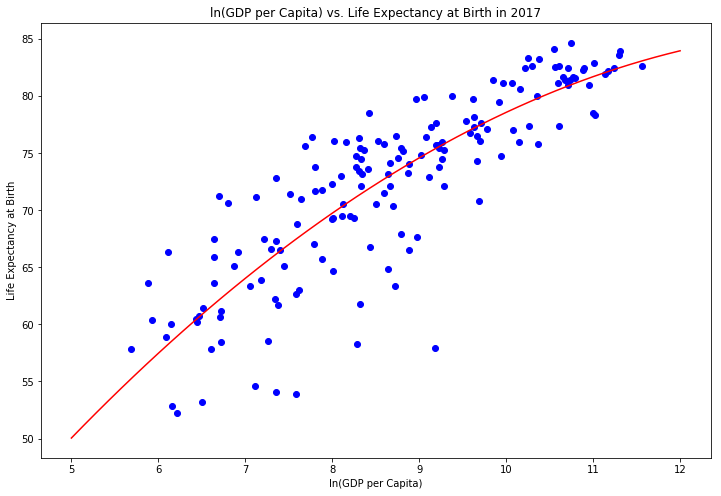

In [23]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# imports math for the floor and ceiling functions
import math


# the code below looks at the summary for the 2017 model regressing life expectancy on 
# gdp per capita and its square and then makes a scatter plot with the regression line

my_models = repeated_linreg(1990, 2017, 'lifexp', ['gdppc', 'gdppc_sq'], comb, 
                                       True)

print(my_models[27].summary())

plt.scatter(comb['2017_gdppc'], comb['2017_lifexp'], color = 'b')
x = np.linspace(math.floor(min(comb['2017_gdppc'])),
                math.ceil(max(comb['2017_gdppc'])))  
y = [i*my_models[27].params[0] + (i ** 2)*my_models[27].params[1] for i in x]
plt.plot(x, y, color = 'r')
plt.xlabel('ln(GDP per Capita)')
plt.ylabel('Life Expectancy at Birth')
plt.title('ln(GDP per Capita) vs. Life Expectancy at Birth in 2017');

To further emphasize the interpretation of models with quadratic terms, I do the same in the model of $ln($GDP per capita$)$. This is a log-level regression, which affects how the coeffients are interpreted. The way to interpret the coefficients in the 2017 model regressing $ln($GDP per capita$)$ on life expectancy and life expectancy$^2$ is an increase of 1 year in life expectancy leads to an increase of $(0.0780 + 2*0.0006 * $life expectancy $)*100$% year increase in GDP per capita.

Generically, an increase of 1 year in life expectancy leads to a $(B_1 + 2* B_2 * $life expectancy$) * 100$% increase in GDP per capita, where $B_1$ is the coefficient of the non-squared term and $B_2$ is the coefficient of the squared term.

                            OLS Regression Results                            
Dep. Variable:             2017_gdppc   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.267e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          8.49e-178
Time:                        19:10:26   Log-Likelihood:                -186.51
No. Observations:                 163   AIC:                             377.0
Df Residuals:                     161   BIC:                             383.2
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
2017_lifexp        0.0780      0.010      8.

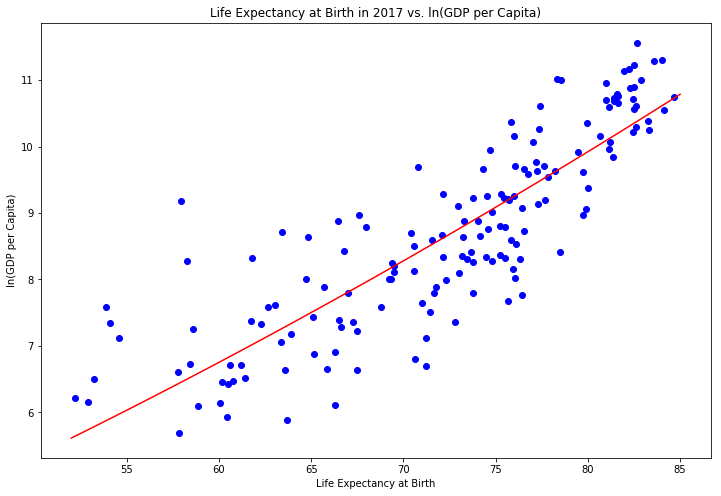

In [24]:
# the code below looks at the summary for the 2017 model regressing life expectancy on 
# gdp per capita and its square and then makes a scatter plot with the regression line

my_models = repeated_linreg(1990, 2017, 'gdppc', ['lifexp', 'lifexp_sq'], comb, 
                                       True)

# the code below looks at the summary for the 2017 model regressing gdp per capita 
# on life expectancy and its square and then makes a scatter plot with the regression line

print(my_models[27].summary())

plt.scatter(comb['2017_lifexp'], comb['2017_gdppc'], color = 'b')
x = np.linspace(math.floor(min(comb['2017_lifexp'])),
                math.ceil(max(comb['2017_lifexp'])))  
y = [i*my_models[27].params[0] + (i ** 2)*my_models[27].params[1] for i in x]
plt.plot(x, y, color = 'r')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('ln(GDP per Capita)')
plt.title('Life Expectancy at Birth in 2017 vs. ln(GDP per Capita)');

My common sense hypothesis about decreasing returns to life expectancy from increases in $ln($GDP per capita$)$ has been confirmed, but I found **increasing returns to** $ln($**GDP per capita**$)$ **from increases in life expectancy**. Although causation has not been established, the theory of healthy workers staying in the work force longer and not dropping out due to illness resulting in more growth seems plausible. The results of this exploration strongly suggest that investing in public health and public healthcare systems will have strong positive effects on the economy of a country. I would expect this holds for similar forms of human capital investment, such as education.